# Install package

In [1]:
# install community
# library(devtools)

# devtools::install_github("SoloveyMaria/community")

# Calculate communication

In [2]:
# libraries
library(community)
library(ggplot2)
library(gridExtra)
library(grid)
library(ComplexHeatmap)
library(dendsort)
library(igraph)
require(circlize)
library(R.utils)
library(data.table) #to read gz file

ComplexHeatmap version 2.14.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))



Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: circlize

circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=circlize
Github pa

In [3]:
getwd()

[1] "/work/project/ladcol_011/lasry"

In [4]:
# the path to the counts, cell annotation and sample annation file. In this case its our working dir same as
# the notebook
path_in <- getwd()

print("path_in")
print(path_in)

[1] "path_in"
[1] "/work/project/ladcol_011/lasry"


In [5]:
sessionInfo()

R version 4.2.2 (2022-10-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/mcelik/miniconda3/envs/community_tutorial/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=de_DE.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=de_DE.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=de_DE.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=de_DE.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] data.table_1.14.8     R.utils_2.12.2        R.oo_1.25.0          
 [4] R.methodsS3_1.8.2     circlize_0.4.15       igraph_1.4.0         
 [7] dendsort_0.3.4        ComplexHeatmap_2.14.0 gridExtra_2.3        
[10] ggplot2_3.4.1         community_1.2.9      

loaded via a

## Load data

To calculate interactions, we will need the following files: normalized and batch corrected `counts`, cell annotation file `anno_cells`, and a sample annotation file `anno_samples`.

The `counts` file contains normalized and batch corrected counts with genes in the rows and cell IDs in the columns.

The `anno_cells` file should contain columns named cell_ID, cell_type and sample_ID.

The `anno_sample` file should countan columns named sample_ID health_status (e.g. "healthy" or "AML") and case_or_conrol (e.g. "control" or "case").

In [6]:
data("LR_database")
print(str(LR_database))

'data.frame':	6858 obs. of  26 variables:
 $ Pair.Name            : chr  "ADAM12_ITGB1" "ADAM12_SDC4" "ADAM15_ITGA5" "ADAM15_ITGA9" ...
 $ Ligand               : chr  "ADAM12" "ADAM12" "ADAM15" "ADAM15" ...
 $ Ligand.Name          : chr  "ADAM metallopeptidase domain 12" "ADAM metallopeptidase domain 12" "ADAM metallopeptidase domain 15" "ADAM metallopeptidase domain 15" ...
 $ Receptor             : chr  "ITGB1" "SDC4" "ITGA5" "ITGA9" ...
 $ Receptor.Name        : chr  "integrin subunit beta 1" "syndecan 4" "integrin subunit alpha 5" "integrin subunit alpha 9" ...
 $ complex_pair         : chr  NA NA NA NA ...
 $ partner_a            : chr  "O43184" "O43184" "Q13444" "Q13444" ...
 $ partner_b            : chr  "P05556" "P31431" "P08648" "Q13797" ...
 $ source               : chr  "O43184" "O43184" "Q13444" "Q13444" ...
 $ target               : chr  "P05556" "P31431" "P08648" "Q13797" ...
 $ source_genesymbol    : chr  "ADAM12" "ADAM12" "ADAM15" "ADAM15" ...
 $ target_genesymbol    : 

In [7]:
# # load counts
print("load counts")
counts <- fread("counts_corr.csv.gz", header = TRUE)
counts <- as.data.frame(counts)
rownames(counts) <- counts$gene_symbol
counts <- counts[,-1]
print(str(counts))

[1] "load counts"
'data.frame':	15770 obs. of  46702 variables:
 $ 2020-09-15-AML0024:CATCAAGGTTAGCGGA           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ 2020-09-15-AML0024:CATCAAGTCCGAGAAG           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ 2020-09-15-AML0024:CATCCACAGGGACCAT           : num  0 0 0 0 0 ...
 $ 2020-09-15-AML0024:CCTCAACAGAGCAAGA           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ 2020-09-15-AML0024:CCTCAACAGTTCCATG           : num  0 0.69 0 0 0 ...
 $ 2020-09-15-AML0024:CCTCAACGTAGAATAC           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ 2020-09-15-AML0024:CCTCAACGTTCTCCCA           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ 2020-09-15-AML0024:CCTCAACTCCGAACGC           : num  0 0 0 0 0 ...
 $ 2020-09-15-AML0024:CCTCAACTCTAGTCAG           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ 2020-09-15-AML0024:CCTCACAAGACAGTCG           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ 2020-09-15-AML0024:CCTCACACAATTGCCA           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ 2020-09-15-AML0024:CCTCACACAGAACTAA           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ 

In [8]:
# load cell annotation
print("load cell annotation")
anno_cells <- read.table(paste0(path_in,"/anno_cells_corr.txt")
                         ,sep = "\t"
                         ,row.names = 1
                         ,header = TRUE
                         )
print(str(anno_cells))

[1] "load cell annotation"
'data.frame':	46702 obs. of  93 variables:
 $ sample_ID                    : chr  "AML-0024" "AML-0024" "AML-0024" "AML-0024" ...
 $ cell                         : chr  "2020-09-15-AML0024:CATCAAGGTTAGCGGA" "2020-09-15-AML0024:CATCAAGTCCGAGAAG" "2020-09-15-AML0024:CATCCACAGGGACCAT" "2020-09-15-AML0024:CCTCAACAGAGCAAGA" ...
 $ UMAP_1                       : num  -0.731 -2.2 -2.867 -1.666 -0.972 ...
 $ UMAP_2                       : num  -15.8 -16.7 -16.1 -16.1 -17.5 ...
 $ orig.ident                   : chr  "2020-09-15-AML0024" "2020-09-15-AML0024" "2020-09-15-AML0024" "2020-09-15-AML0024" ...
 $ samples                      : chr  "AML0024" "AML0024" "AML0024" "AML0024" ...
 $ Broad_cell_identity          : chr  "CD14+ monocyte" "CD14+ monocyte" "CD16+ monocyte" "CD14+ monocyte" ...
 $ Cell_type_identity           : chr  "CD14+ IFN+" "CD14+" "CD16+" "CD14+ IFN+" ...
 $ clusters_res.2               : int  7 7 7 7 80 7 7 7 7 7 ...
 $ CNV_pos                   

In [9]:
# load sample annotation
print("load sample annotation")
anno_samples <- read.table(paste0(path_in,"/anno_samples_corr.txt")
                           ,sep = "\t"
                           ,row.names = 1
                           ,header = TRUE
                           )
print(str(anno_samples))

[1] "load sample annotation"
'data.frame':	13 obs. of  60 variables:
 $ Sample.ID                    : chr  "U-06-0024" "U-16-0160" "U-11-0693" "U-18-1371" ...
 $ sex                          : chr  "M" "M" "F" "M" ...
 $ Age                          : int  64 74 77 78 71 57 80 26 39 50 ...
 $ Sequencing                   : chr  "CITE-seq" "CITE-seq" "CITE-seq + scTCR-seq" "CITE-seq" ...
 $ sample_ID                    : chr  "AML-0024" "AML-0160" "AML-0693" "AML-1371" ...
 $ Institution                  : chr  "OSU" "OSU" "OSU" "OSU" ...
 $ Manuscript.ID                : chr  "AML0024" "AML0160" "AML0693" "AML1371" ...
 $ Dx                           : chr  "AML" "AML" "AML" "AML" ...
 $ DxELN_Cytogenetic            : chr  "Adverse" "Adverse" "Adverse" "" ...
 $ Cytogenetics                 : chr  "48,XY,+8,+8,i(8)(p10),t(9;15)(q33;q15),del(10)(q22.1q24),del(13)(q14q21)" "46,XY[30]" "74-89<4n>,XXXX,-8,-9,-9,-12,-17,i(17)(q10),+mar1,+mar2,+dmin[cp18]/46,XX[2] .ish dmin(amp CMYC)" "46,X

The ligand-receptor pair database is provided by the algorithm, but the user can also use a custom database. In this case, the custom database should have the columns named 'Ligand', 'Receptor' and 'Pair.Name'. 

## Thresholds

When calculation the interactions, it is possible to set three threshold: 
- `threshold_celltype_size` is a threshold for the minimum number of cells that a cell type should contain (in one sample). If the number of cells in the cell type of interest in a particular sample is less or equal to the `threshold_celltype_size`, then we consider this cell type as missing in this sample. This threshold affects the relative cell type abundance parameter (rho). The deafult value for the `threshold_celltype_size` is 4. 
- `threshold_nr_active_cells` is a threshold for the minimum number of active cells in a cell type (in the sample of interest). A cell is concidered as active (for a specific gene), if it is expressing this gene above the `threshold_expr`. If the number of active cells (for a specific gene) in a cell type is smaller or equal to the `threshold_nr_active_cells`, i.e. does not pass the threshold, then it is set to zero (in this sample). This threshold affects the relative active fraction (phi) parameter. The deafult value for the `threshold_expr` is zero.
- `threshold_expr` is a threshold for an expression value of a gene in a cell. If an expression value af a gene in a cell is smaller or equal to the `threshold_expr` value, it will be set to zero. This threshold affects the relative active fration (phi) and the relative mean expression (p) paramteres. The deafult value for the `threshold_expr` is zero. In our analysis, we will though set it arbtrarily to 0.05.

In [10]:
# set threshold of the cell type size
threshold_celltype_size <- 6
print("threshold_celltype_size >")
print(threshold_celltype_size)

[1] "threshold_celltype_size >"
[1] 6


In [11]:
# set threshold of the minimum number of active cells
threshold_nr_active_cells <- 6
print("threshold_nr_active_cells >")
print(threshold_nr_active_cells)

[1] "threshold_nr_active_cells >"
[1] 6


In [12]:
# set threshold of expression
threshold_expr <- 0.1
print("threshold_expr >")
print(threshold_expr)

[1] "threshold_expr >"
[1] 0.1


## Calculate interactions

In [13]:
# Renaming the cell_ID.1 column in anno_cells to "cell_ID"
# colnames(anno_cells)[colnames(anno_cells) == "cell_ID.1"] <- "cell_ID"

In [14]:
colnames(counts) <- anno_cells$cell_ID

In [15]:
rownames(anno_cells) <- anno_cells$cell_ID

In [16]:
print("calculate communication")
interactions = calculate_communication(counts = counts
                                       ,anno_samples = anno_samples
                                       ,anno_cells = anno_cells
                                       ,threshold_celltype_size = threshold_celltype_size
                                       ,threshold_nr_active_cells = threshold_nr_active_cells
                                       ,threshold_expr = threshold_expr
                                       ,lrp_database = LR_database
                                       )

# print(str(interactions))


[1] "calculate communication"


Warning message in e_cellType_gene(counts = counts_sub, anno_cells = anno_cells_sub, :
“WARNING: sample AML-0160 does not contain cell type NK -- interactions for this cell type in this sample will get zero values.”
Warning message in e_cellType_gene(counts = counts_sub, anno_cells = anno_cells_sub, :
“WARNING: sample AML-2123 does not contain cell type DC -- interactions for this cell type in this sample will get zero values.”
Warning message in e_cellType_gene(counts = counts_sub, anno_cells = anno_cells_sub, :
“WARNING: sample AML-4340 does not contain cell type Ery -- interactions for this cell type in this sample will get zero values.”


## Calculate general statistics

The `general_stat` function calculates for each interaction several parameters that will be used for the QC, visualization and the differential communication analysis. 

Following parameters for the QC step will be stored in the `anno_interactions` list:
- mean expression of a ligand in the active fraction of the sending cell type within the control cohort (`mean_e_s_l_control`) and within the case cohort (`mean_e_s_l_case`). 
- mean  expression of a receptor in the active fraction of the receiving cell type within the control cohort (`mean_e_r_r_control`) and within the case cohort (`mean_e_r_r_case`).

Following parameters for the visulisation will be stored in the `anno_interactions` list:
- log2 fold change of `rho_s` between the cases and the controls (`log2FC_rho_s`). It shows for each interaction, how the cell type abundance of the sending cell type changed in the cases compared to the controls.
- log2 fold change of `rho_r` between the cases and the controls (`log2FC_rho_r_r`). It shows for each interaction, how the cell type abundance of the receiving cell type changed in the cases compared to the controls.
- log2 fold change of `rho` between the cases and the controls (`log2FC_rho`). It shows for each interaction, how the whole `rho` parameter changed in the cases compared to the controls.
- log2 fold change of `phi_l_s` between the cases and the controls (`log2FC_phi_l_s`). It shows for each interaction, how the active fraction of the ligand in the sending cells changed in the cases compared to the controls.
- log2 fold change of `phi_r_r` between the cases and the controls (`log2FC_phi_r_r`). It shows for each interaction, how the active fraction of the receptors in the receiving cells changed in the cases compared to the controls.
- log2 fold change of `phi` between the cases and the controls (`log2FC_phi`). It shows for each interaction, how the whole `phi` parameter changed in the cases compared to the controls.
- log2 fold change of `p_l_s` between the cases and the controls (`log2FC_p_l_s`). It shows for each interaction, how the mean expression whithin the active fraction of the ligand in the sending cells changed in the cases compared to the controls.
- log2 fold change of `p_r_r` between the cases and the controls (`log2FC_p_r_r`). It shows for each interaction, how the mean expression whithin the active fraction of the receptor in the receiving cells changed in the cases compared to the controls.
- log2 fold change of `p` between the cases and the controls (`log2FC_p`). It shows for each interaction, how the whole `p` parameter changed in the cases compared to the controls.

Following parameter for the differential communication analysis will be stored in the `anno_interactions` list:
- log2 fold change of `weights` between the cases and the controls (`log2FC_weights`). It shows for each interaction, how the whole interaction weight changed in the cases compared to the controls.


In [17]:
print("calculate general statistics")

interactions <- general_stat(comm_result = interactions
                                   ,verbose = FALSE#TRUE
)
print(str(interactions$anno_interactions))

[1] "calculate general statistics"
'data.frame':	148672 obs. of  19 variables:
 $ interaction_ID     : chr  "Mono:ADAM12_Mono:ITGB1" "Mono:ADAM12_Mono:SDC4" "Mono:ADAM15_Mono:ITGA5" "Mono:ADAM15_Mono:ITGA9" ...
 $ ligand_gene_name   : chr  "ADAM12" "ADAM12" "ADAM15" "ADAM15" ...
 $ receptor_gene_name : chr  "ITGB1" "SDC4" "ITGA5" "ITGA9" ...
 $ sending_cell_type  : chr  "Mono" "Mono" "Mono" "Mono" ...
 $ receiving_cell_type: chr  "Mono" "Mono" "Mono" "Mono" ...
 $ mean_e_s_l_control : num  0.498 0.498 0.796 0.796 0.819 ...
 $ mean_e_s_l_case    : num  0.336 0.336 0.749 0.749 0.821 ...
 $ mean_e_r_r_control : num  0.855 0.762 0.802 0.625 0.802 ...
 $ mean_e_r_r_case    : num  0.849 0.691 0.778 0.579 0.778 ...
 $ log2FC_rho_s       : num  -0.455 -0.455 -0.455 -0.455 -0.455 ...
 $ log2FC_rho_r       : num  -0.455 -0.455 -0.455 -0.455 -0.455 ...
 $ log2FC_rho         : num  0.145 0.145 0.145 0.145 0.145 ...
 $ log2FC_phi_s_l     : num  7.419 7.419 0.414 0.414 0.737 ...
 $ log2FC_phi_r_r   

# QC

For the quality check, we use three filters: the **interaction weight filter**, the **presense per cohort filter** and the **ligand/receptor expression filter**. An interaction is considered of good quality, if it passes all three filters.

The **interaction weight filter** checks the log10 cumulative weight of the interaction. To pass this filter, the interaction need to be greater than the `threshold_log10_cum_weight` threshold.

In [18]:
threshold_log10_cum_weight <-  0.01
print("threshold_log10_cum_weight >")
print(threshold_log10_cum_weight)

[1] "threshold_log10_cum_weight >"
[1] 0.01


The **presense per cohort filter** checks the fraction of samples in which an interaction was detected (i.e. has a non-zero value) in the control cohort and in the case cohort. To pass this filter, an interaction needs to has a greater value than the `threshold_frac_samples_per_condition` threshold either in the control cohort or in the case cohort or in both.

In [19]:
threshold_frac_samples_per_condition <-  0.6
print("threshold_frac_samples_per_condition >")
print(threshold_frac_samples_per_condition)

[1] "threshold_frac_samples_per_condition >"
[1] 0.6


The **ligand/receptor expression filter** checks the mean expression level of the ligand and the receptor of an interaction in the case and the control samples (separately). This filters uses a `threshold_log10meanexpr_per_condition` threshold.
For each einteraction four values are checked:
- log10 mean expression of the ligand in sending cells in control samples
- log10 mean expression of the receptor in receiving cells in control samples
- log10 mean expression of the ligand in sending cells in case samples
- log10 mean expression of the receptor in receiving ccells in case samples.


An interaction passes this filter if both its ligand and receptor pass the threshold either in control samples or in case samples or in both.

In [20]:
threshold_log10_meanexpr_per_condition <- 0.02
print("threshold_log10_meanexpr_per_condition >")
print(threshold_log10_meanexpr_per_condition)

[1] "threshold_log10_meanexpr_per_condition >"
[1] 0.02


A good quality interaction should pass all filters.

The `filter_interactions` function produces one plot for the **interaction weight filter**, two plots for the **presense per cohort filter** (one for the controls and one for the cases) and two plots for the **ligand/receptor expression filter** (one for the controls and one for the cases). It writes the selected threshold values in the `thresholds` list of the interaction object and stores the filtering results as boolean vectors (one per threshold) in the `anno_interactions` list. The function does not subset the data, so if you want to change the filtering parameters, you can re-define the thresholds and re-run the `filter_interactions` function.

[1] "filter weak interactions"


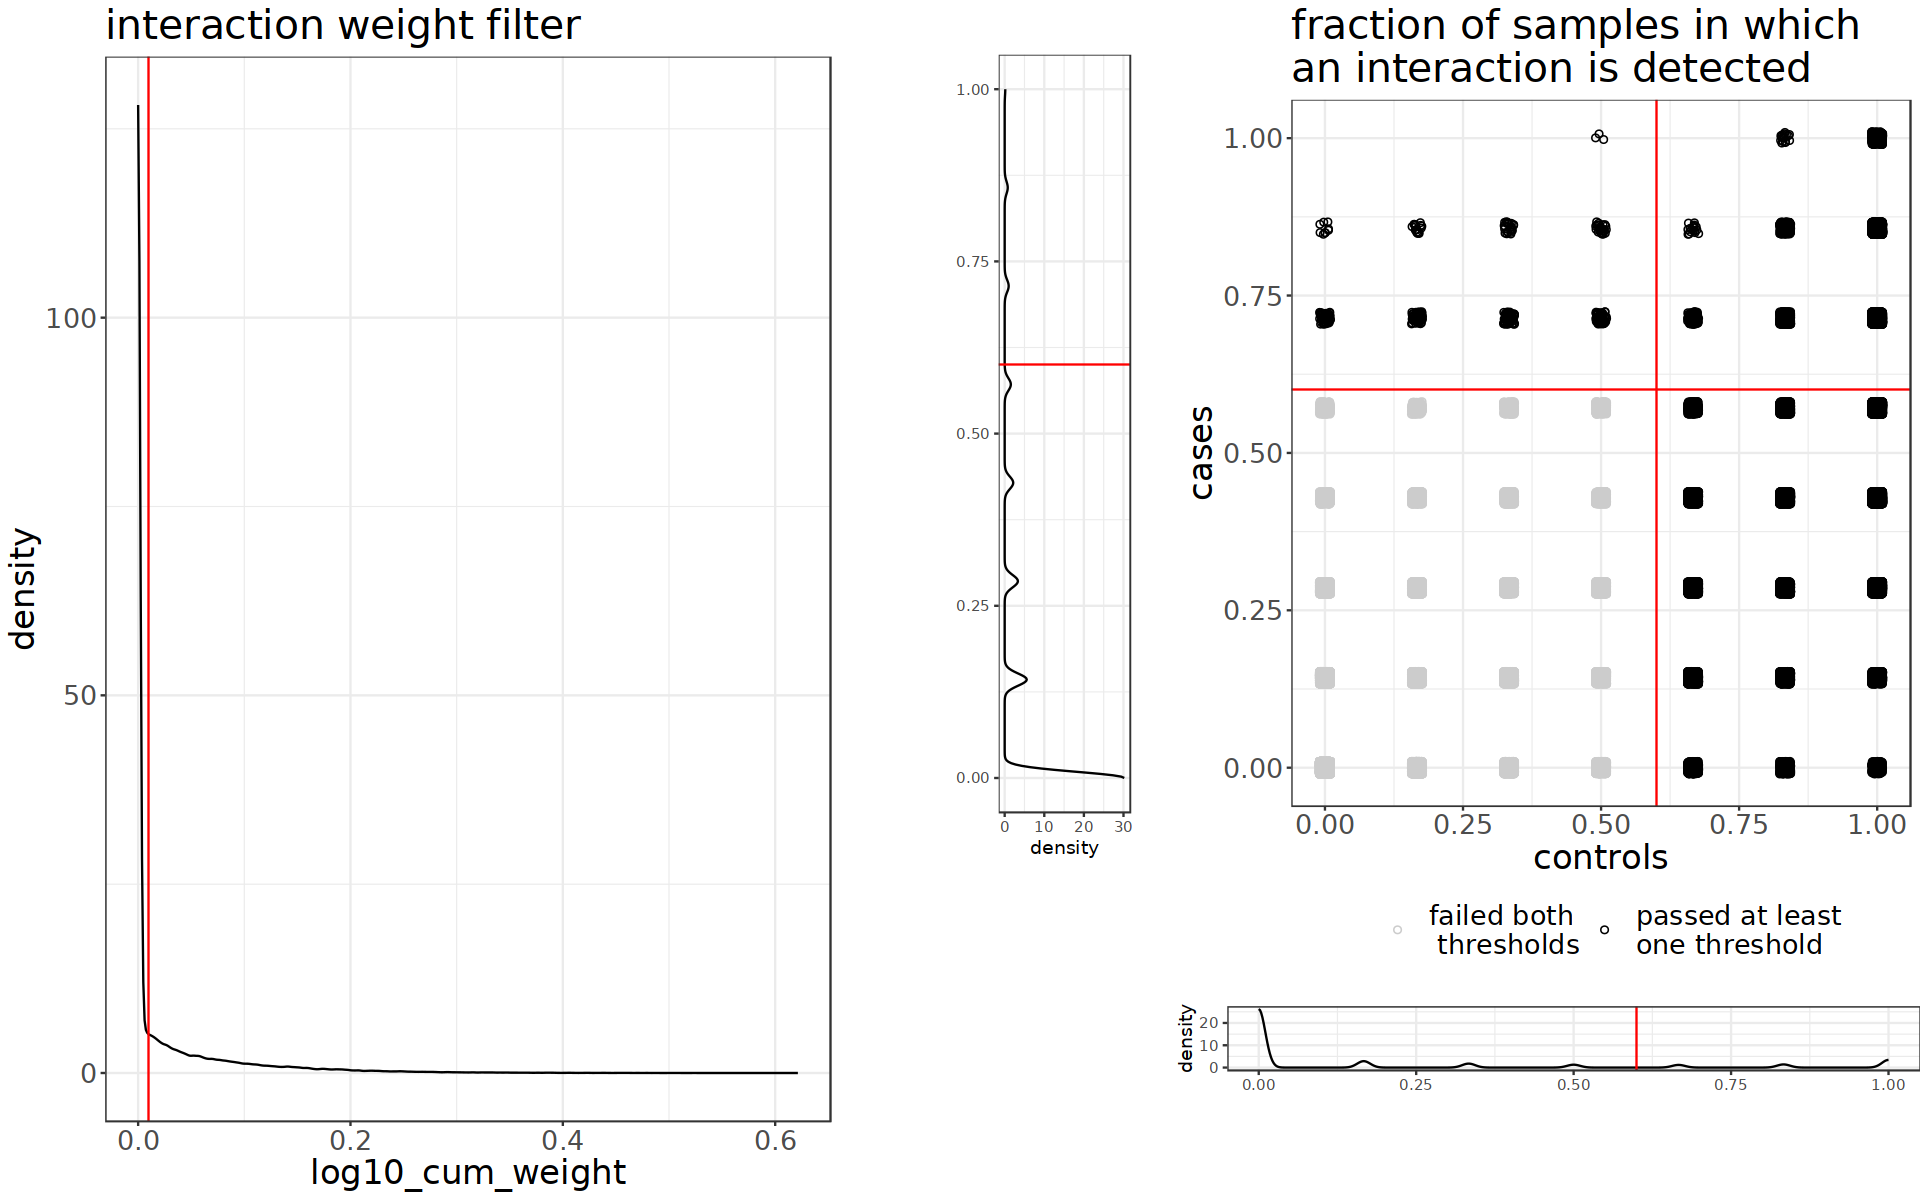

[1] "125826 out of 148672 interactions do not pass the thresholds for log10 cumulative interactions weight > 0.01 and fraction of expressing samples > 0.6 . Also  11667  interactions didn't pass the discrepancy filter.  In total, 125826  bad quality interactions will be removed and 22846 good quality interactions will remain."


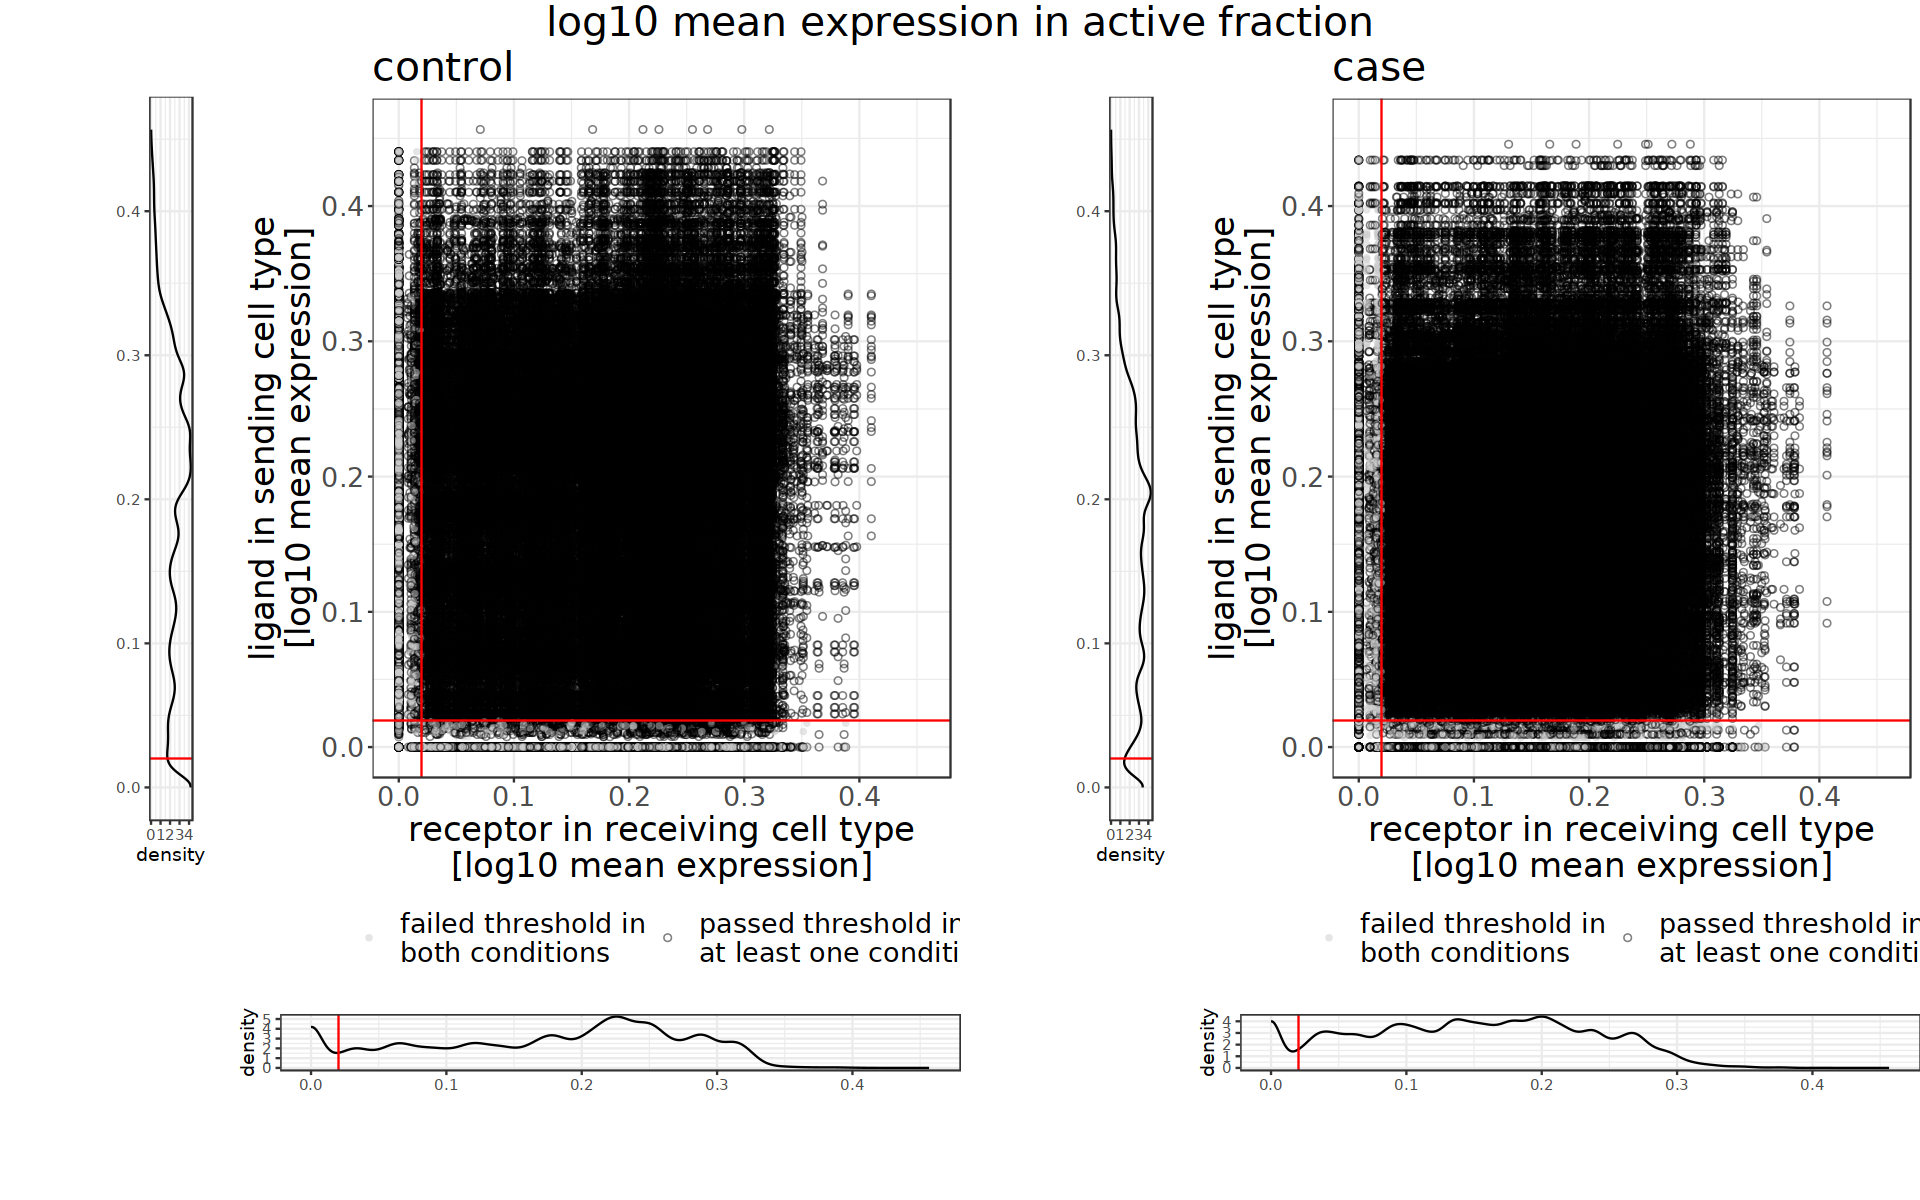

In [21]:
print("filter weak interactions")

options(repr.plot.height = 10
       ,repr.plot.width = 16)
interactions <- filter_interactions(comm_result = interactions
                             ,threshold_frac_samples_per_condition = threshold_frac_samples_per_condition
                             ,threshold_log10_cum_weight = threshold_log10_cum_weight
                             ,threshold_log10_meanexpr_per_condition = threshold_log10_meanexpr_per_condition
)

In [22]:
print(str(interactions$thresholds))
print(str(interactions$anno_interactions))

List of 6
 $ threshold_expr                        : num 0.1
 $ threshold_nr_active_cells             : num 6
 $ threshold_celltype_size               : num 6
 $ threshold_log10_cum_weight            : num 0.01
 $ threshold_frac_samples_per_condition  : num 0.6
 $ threshold_log10_meanexpr_per_condition: num 0.02
NULL
'data.frame':	148672 obs. of  28 variables:
 $ interaction_ID                            : chr  "Mono:ADAM12_Mono:ITGB1" "Mono:ADAM12_Mono:SDC4" "Mono:ADAM15_Mono:ITGA5" "Mono:ADAM15_Mono:ITGA9" ...
 $ ligand_gene_name                          : chr  "ADAM12" "ADAM12" "ADAM15" "ADAM15" ...
 $ receptor_gene_name                        : chr  "ITGB1" "SDC4" "ITGA5" "ITGA9" ...
 $ sending_cell_type                         : chr  "Mono" "Mono" "Mono" "Mono" ...
 $ receiving_cell_type                       : chr  "Mono" "Mono" "Mono" "Mono" ...
 $ mean_e_s_l_control                        : num  0.498 0.498 0.796 0.796 0.819 ...
 $ mean_e_s_l_case                           : nu

# Differential Communication

For calculating statistically significant differential interactions between the cases and the controls, we need to define an adjusted p-value threhsold and the log2 fold change threshold. 

In [23]:
# Set up log2 fold change threshold. The default value is 1
threshold_log2FC <- 1
print(paste("[absolute] threshold_log2FC >",threshold_log2FC))

[1] "[absolute] threshold_log2FC > 1"


In [24]:
# Set up FDR threshold. The default value is 0.1
threshold_fdr <- 0.1
print(paste("threshold_fdr <",threshold_fdr))

[1] "threshold_fdr < 0.1"


The `test_diff` function stores the thresholds in the `thresholds` list of the interactions object.

The `test_diff` function calculates a p-value for each interaction using a Wilcoxon test and adjusts for multiple testing using the FDR correction method. After that, the function checks whether the log2 fold change and the adjusted p-value thresholds were passed. An interactoin is considered significant if it passes both threshodls. The `test_diff` function stores the results as boolean vector to the `anno_interactions` list of the interactions object.

In [26]:
print("calculate differential communication")
interactions <- test_diff(comm_result = interactions
                          ,threshold_fdr = threshold_fdr
                          ,which_test = "t-test"
                          ,threshold_log2FC = threshold_log2FC
                          
                         )
print(str(interactions$thresholds))
print(str(interactions$anno_interactions))

[1] "calculate differential communication"
[1] "We have 2740 dignificantly differential interactions"
List of 8
 $ threshold_expr                        : num 0.1
 $ threshold_nr_active_cells             : num 6
 $ threshold_celltype_size               : num 6
 $ threshold_log10_cum_weight            : num 0.01
 $ threshold_frac_samples_per_condition  : num 0.6
 $ threshold_log10_meanexpr_per_condition: num 0.02
 $ threshold_fdr                         : num 0.1
 $ threshold_log2FC                      : num 1
NULL
'data.frame':	148672 obs. of  33 variables:
 $ interaction_ID                            : chr  "Mono:ADAM12_Mono:ITGB1" "Mono:ADAM12_Mono:SDC4" "Mono:ADAM15_Mono:ITGA5" "Mono:ADAM15_Mono:ITGA9" ...
 $ ligand_gene_name                          : chr  "ADAM12" "ADAM12" "ADAM15" "ADAM15" ...
 $ receptor_gene_name                        : chr  "ITGB1" "SDC4" "ITGA5" "ITGA9" ...
 $ sending_cell_type                         : chr  "Mono" "Mono" "Mono" "Mono" ...
 $ receiving_cell

# Visualisation

In [27]:
# load("interactions.RData")

In [28]:
idx_up <- interactions$anno_interactions$log2FC_weights >1
idx_unchanged <- abs(interactions$anno_interactions$log2FC_weights)<=1
idx_down <- interactions$anno_interactions$log2FC_weights < -1
idx_sign <- !is.na(interactions$anno_interactions$sign) & interactions$anno_interactions$sign
idx_good <- interactions$anno_interactions$passed_QC_filter

In [29]:
cell_types <- unique(interactions$anno_cells$cell_type)
print(cell_types)

[1] "Mono" "Gran" "T"    "NK"   "B"    "HSPC" "Ery"  "DC"  


### Mean weight of good quality edges

In [30]:
# dir.create("/figures")

            Mono        Gran           T          NK           B       HSPC
Mono 0.043623483 0.040733163 0.010941827 0.009153616 0.004839469 0.01147267
Gran 0.041770720 0.054880069 0.016230927 0.011288743 0.018508716 0.02802534
T    0.011845007 0.012744538 0.092610163 0.078329329 0.022029134 0.02841799
NK   0.009485147 0.008643514 0.078119976 0.075080882 0.014483963 0.01802844
B    0.005693182 0.018166273 0.023598367 0.015777084 0.019446318 0.02484931
HSPC 0.011417997 0.027934378 0.029636591 0.018603581 0.025391338 0.04862390
Ery  0.001319146 0.005663827 0.009519506 0.002793339 0.008441337 0.02197271
DC   0.012882350 0.019244007 0.032769255 0.029917372 0.007440578 0.01200550
              Ery           DC
Mono 0.0011516750 0.0112417434
Gran 0.0056635381 0.0166258127
T    0.0081630182 0.0281039405
NK   0.0028292450 0.0248955642
B    0.0076401454 0.0063898847
HSPC 0.0219159232 0.0098589994
Ery  0.0138861480 0.0005007446
DC   0.0006770067 0.0209757902


Warning message:
“The input is a data frame-like object, convert it to a matrix.”


            Mono        Gran           T          NK           B        HSPC
Mono 0.029868354 0.043079595 0.025765080 0.022087407 0.027905224 0.006861376
Gran 0.047264503 0.078956634 0.038651804 0.028475345 0.047696797 0.011943666
T    0.023645715 0.034176499 0.035461312 0.022775738 0.032075973 0.005626103
NK   0.020952415 0.026711169 0.023355805 0.018708684 0.018254568 0.004632546
B    0.026962055 0.042534861 0.034493347 0.019743584 0.054017964 0.006519334
HSPC 0.007513306 0.012078687 0.006878739 0.005091450 0.007757120 0.001647948
Ery  0.006664024 0.007870377 0.003773545 0.004222751 0.005676905 0.001199431
DC   0.048360280 0.067979905 0.037688865 0.032543883 0.040779201 0.011033591
             Ery          DC
Mono 0.006697844 0.043548476
Gran 0.008333066 0.067107910
T    0.003527405 0.032572328
NK   0.004255899 0.029650187
B    0.005390998 0.037146106
HSPC 0.001185860 0.011092890
Ery  0.001272197 0.008263703
DC   0.008235042 0.069288449


Warning message:
“The input is a data frame-like object, convert it to a matrix.”


[[1]]
png 
  2 

[[2]]
png 
  2

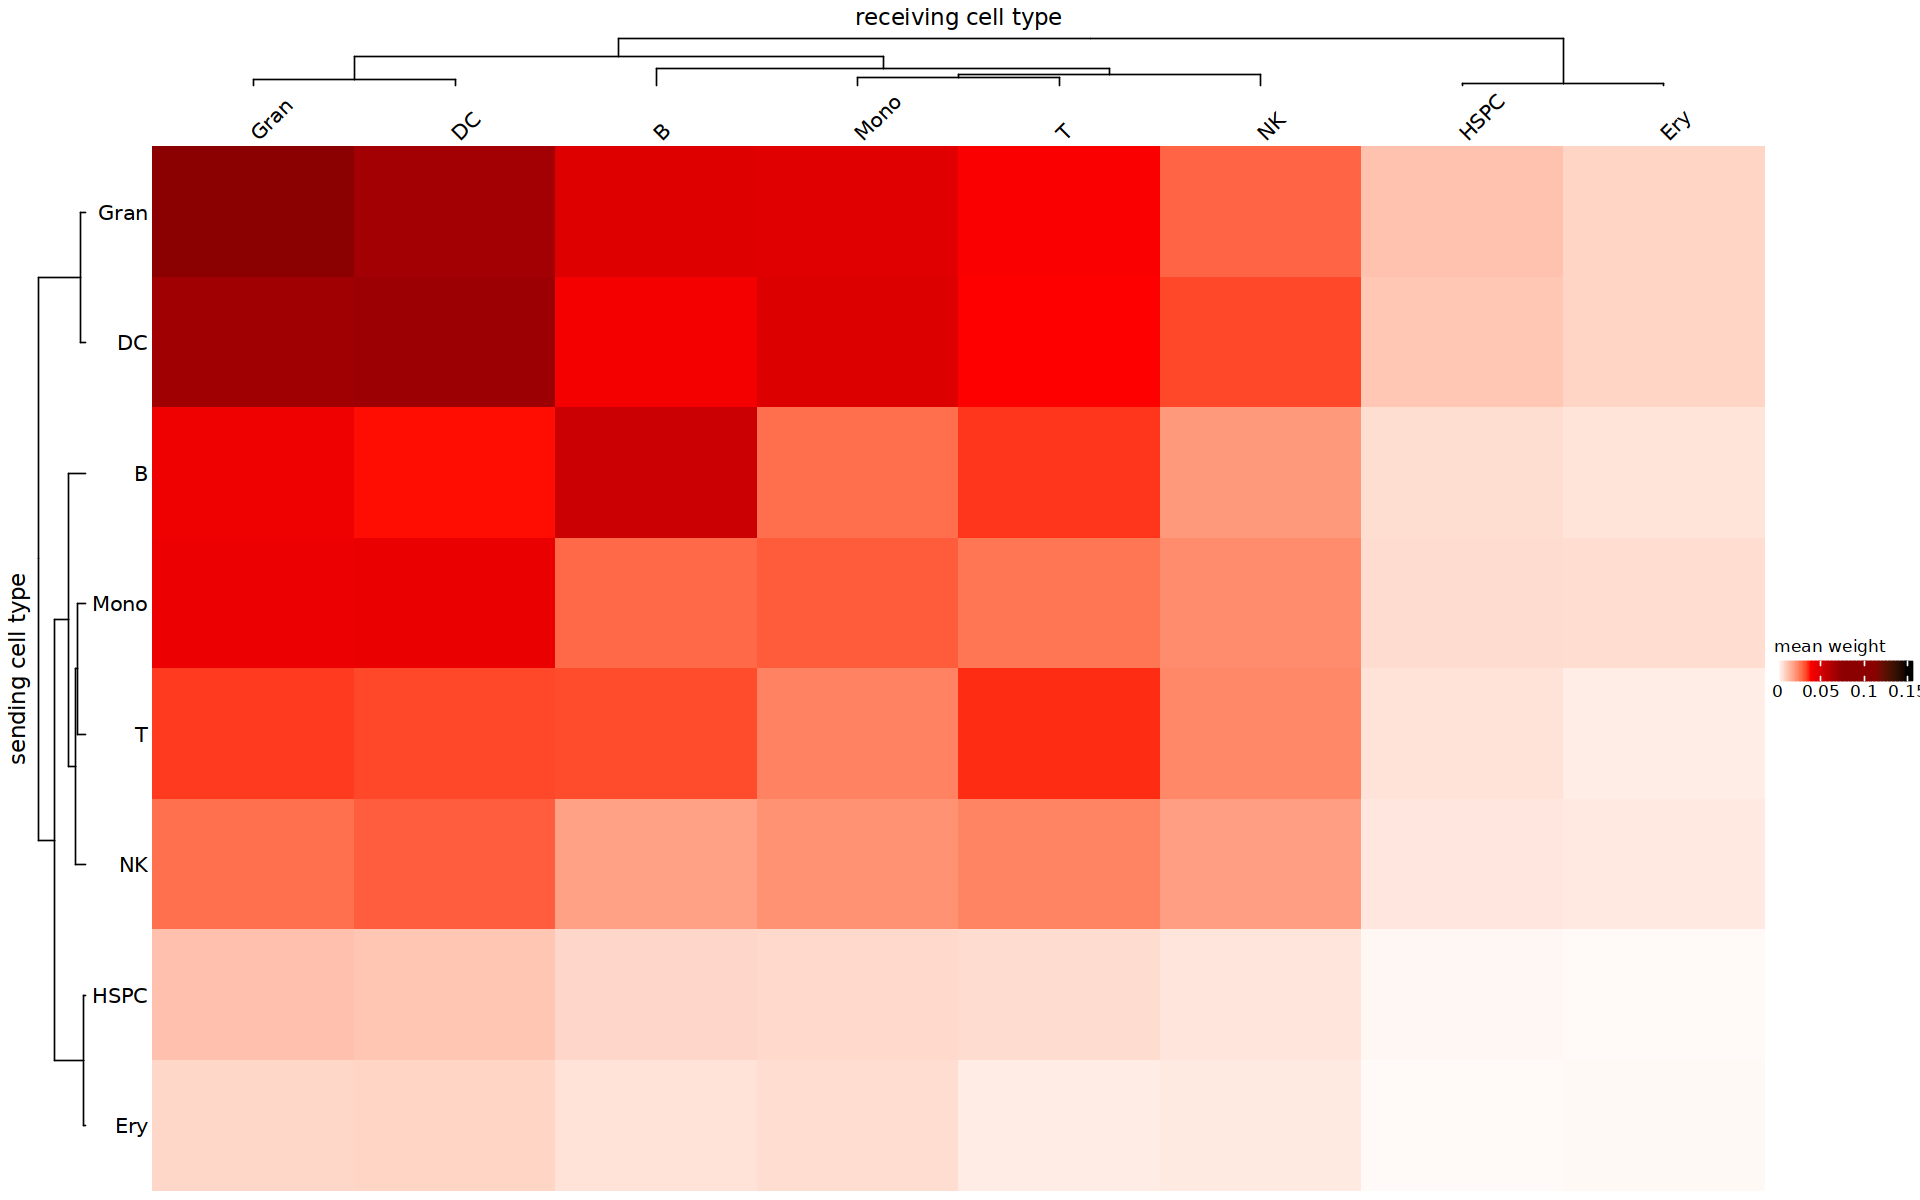

In [31]:
# heatmap of total weight of good interactions
lapply(c("AML","healthy")
      ,function(hs){
          
          idx_hs <- interactions$anno_samples$health_status == hs
          
          # number of interactions as heatmap
    df <- as.data.frame(matrix(,nrow = length(cell_types)
                              ,ncol = length(cell_types)
                              )
                       )
    rownames(df) <- cell_types
    colnames(df) <- cell_types

    # populate the data frame
    for(send in cell_types){
        idx_send <- interactions$anno_interactions$sending_cell_type == send

        for(rec in cell_types){
            idx_rec <- interactions$anno_interactions$receiving_cell_type == rec

            #print(send)
            #print(rec)
            #print(head(interactions$anno_interactions[idx_good & idx_send & idx_rec,c("interaction_ID"
            #                                                                          ,"log2FC_weights"
            #                                                                          , "sign")]))
            #print(sum(idx_good & idx_send & idx_rec))

            weights <- interactions$weights[idx_good & idx_send & idx_rec,idx_hs]
            #ifelse(length(weights) == 0
            #      ,df[send,rec] <- 0
                 # ,
            df[send,rec] <- mean(unlist(weights))
             #     )
            

        }
    }

    print(df)

    my_color <-  colorRamp2(seq(0
                                , 0.15 #max(df)
                                , length = 5)
                            , c("white", "red", "red4",  "darkred", "black"))

    h <- Heatmap(df
                 ,name = "mean weight"
                 ,heatmap_legend_param = list(direction = "horizontal")
                 ,column_names_side = "top"
                 ,row_names_side = "left"
                 ,col = my_color
                 ,column_title = "receiving cell type"
                 ,row_title = "sending cell type"
                 #,cluster_columns=FALSE
                 #,cluster_rows=FALSE
                 #,row_order = c("HSPC", "DC", "Mono", "Ery", "B", "T")
                 #,column_order = c("HSPC","DC", "Mono", "Ery", "B", "T")
                 ,column_names_rot = 45
                )
          # draw(
               print(h)
             #,heatmap_legend_side = "bottom")

    pdf(file=paste0("figures/heatmap_cellTypes_meanWeight_"
                    ,hs
                    ,".pdf"))
         # draw(
              print(h)
             #,heatmap_legend_side = "bottom")
           dev.off()
      })

### Volcano plot

We can now visualize the interactions with a volcano plot. 

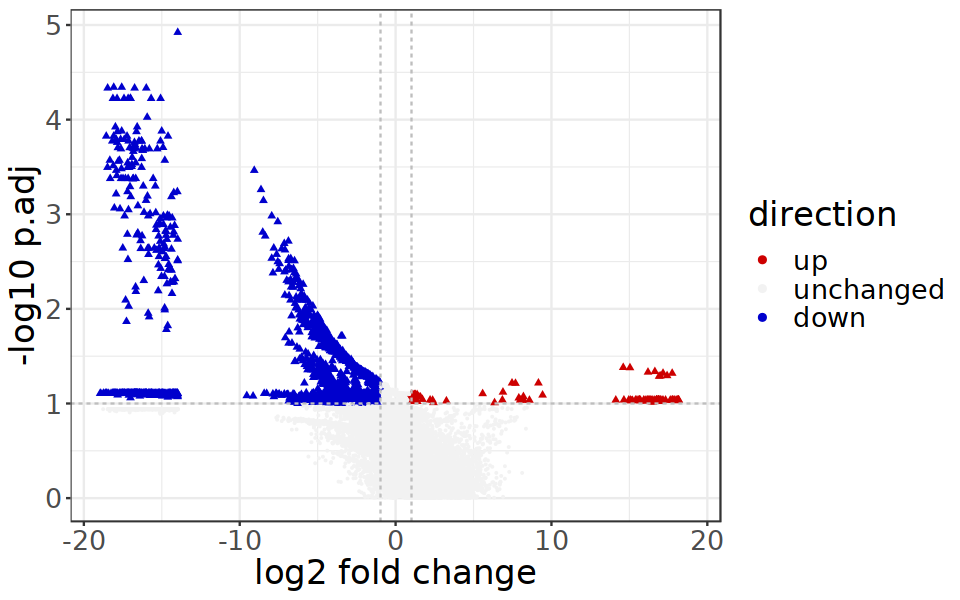

In [32]:
# volcano plot
options(repr.plot.height = 5
       ,repr.plot.width = 8)

df <- data.frame(log2FC = interactions$anno_interactions$log2FC_weights[idx_good]
                 ,y = -log10(interactions$anno_interactions$p.adj[idx_good])
                 ,significant = interactions$anno_interactions$sign[idx_good]
                )

df$direction <- "unchanged"
df$direction[df$significant & (df$log2FC > 1)] <- "up"
df$direction[df$significant & (df$log2FC < -1)] <- "down"
df$direction <- factor(df$direction
                      ,levels = c("up"
                                 ,"unchanged"
                                 ,"down")
                      ,ordered = TRUE)

xlab <- "log2 fold change"
ylab <- "-log10 p.adj"

xlim <- c(-max(abs(df$log2FC))
          ,max(abs(df$log2FC))
         )
ylim <- c(0, max(df$y))

p <- ggplot(data = df
            ,aes(x = log2FC
                 ,y = y
                 ,color = direction
                 ,size = significant
                 ,shape = significant
                ))+
geom_point()+
scale_color_manual(values = c("red3"
                               ,"gray95"
                               ,"blue3"))+
scale_size_manual(values = c(0.5, 1.5))+
guides(size = "none"
      ,shape = "none")+
xlab(xlab)+
ylab(ylab)+
xlim( xlim )+
ylim(ylim)+
theme_bw()+
theme(text = element_text(size=20))+
geom_vline(xintercept = interactions$thresholds$threshold_log2FC
          ,lty = 2
          ,color = "gray")+
geom_vline(xintercept = -interactions$thresholds$threshold_log2FC
          ,lty = 2
          ,color = "gray")+
geom_hline(yintercept = -log10(interactions$thresholds$threshold_fdr)
          ,lty = 2
          ,color = "gray")
p




   up unchanged down
1 109     20106 2631


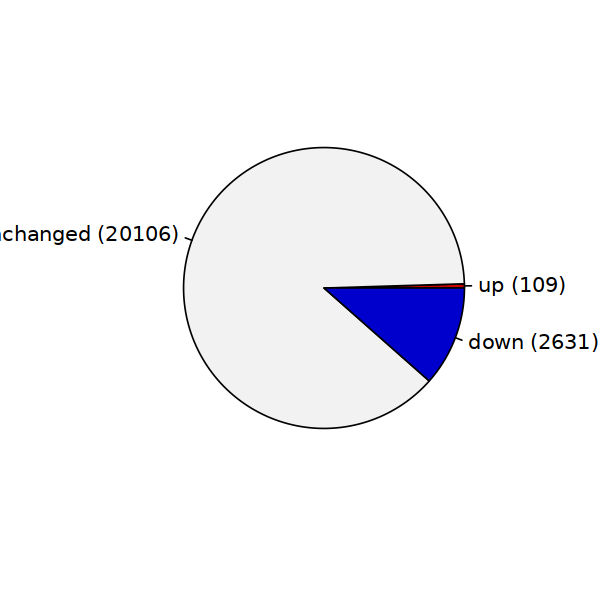

In [33]:
# pie chart
df <- data.frame(up = sum(idx_good & idx_sign & idx_up)
                ,unchanged = sum(idx_good & !idx_sign)
                , down = sum(idx_good & idx_sign & idx_down)
                )
print(df)

options(repr.plot.width = 5
       ,repr.plot.height = 5)
pie(unlist(df)
   ,labels = paste0(colnames(df)," (",unlist(df), ")")
   ,col = c("red3"
           ,"gray95"
           ,"blue3")) 

### Heatmap of top differential interactions

In [34]:
# heatmap of interactions weight of top differential interactions
# top adjusted p value
idx_topsign <- interactions$anno_interactions$p.adj %in% unique(sort(interactions$anno_interactions$p.adj))[1:500]
# all upregulated interactions
idx_topup <- interactions$anno_interactions$log2FC_weights > 1 & idx_topsign

# top 20 downregulated interactions
idx_topdown <- interactions$anno_interactions$log2FC_weights < -1 & idx_topsign
idx_topdown20 <- interactions$anno_interactions$interaction_ID %in% interactions$anno_interactions$interaction_ID[idx_topdown][1:20]

idx <- idx_topup | idx_topdown20
print(sum(idx))

[1] 31


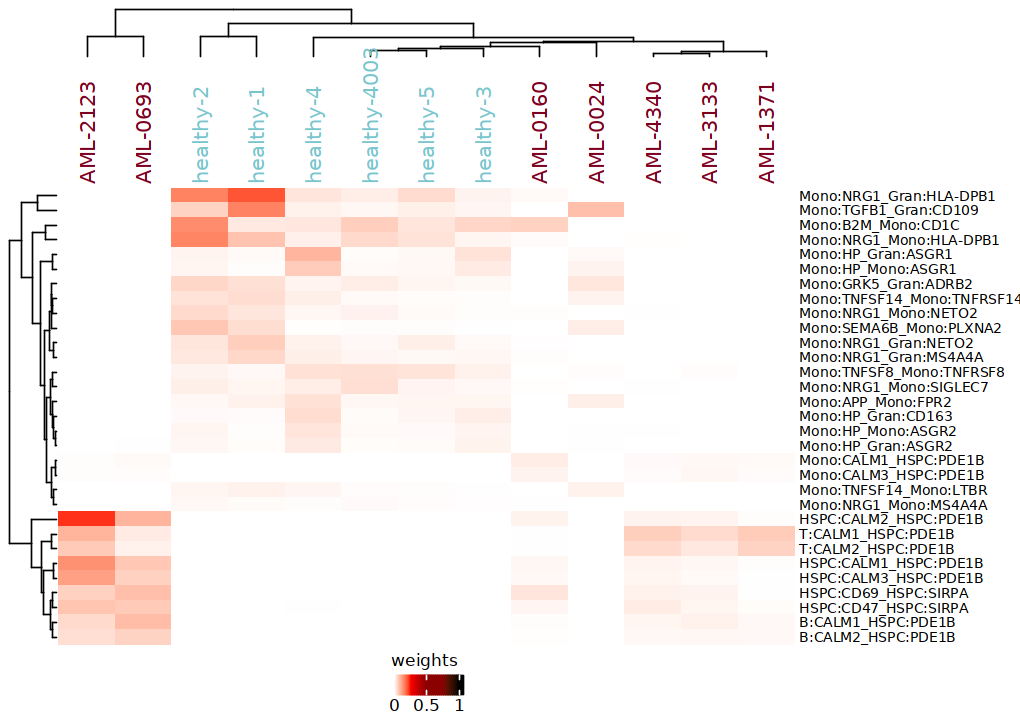

In [35]:
set.seed(1)
options(repr.plot.height = 6
       ,repr.plot.width = 8.5)
plot_heatmap(interactions
            ,which_interactions = idx
            ,values_to_plot = "weights")

#### Individual parameters

  cell_type  log2FC_rho
6      HSPC  2.17786184
7       Ery  1.68004637
3         T  0.16795948
4        NK  0.05044305
1      Mono -0.45469947
2      Gran -0.51086488
5         B -0.67813612
8        DC -1.37836811


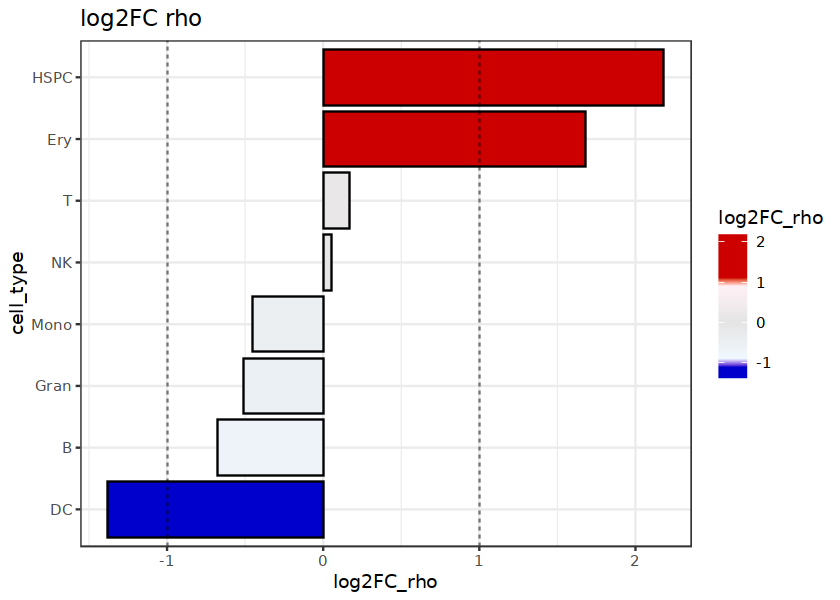

In [36]:
# plot log2FC rho for cell types
df <- data.frame(cell_type = cell_types)
df$log2FC_rho <- sapply(cell_types
                       ,function(ct){
                           idx_ct <- interactions$anno_interactions$sending_cell_type == ct # just take the sending
                         interactions$anno_interactions$log2FC_rho_s[idx_ct][1] # just take the first one
                       })
df <- df[order(df$log2FC_rho,decreasing = TRUE),]
df$cell_type <- factor(df$cell_type
                         ,levels = df$cell_type
                         ,ordered = TRUE)
print(df)

my_values <- c(min(df$log2FC_rho),-1.1,-0.9,0,0.9,1.1,max(df$log2FC_rho))
my_colors <- c("blue3","blue3","aliceblue","gray90","lavenderblush","red3","red3")
names(my_colors) <- my_values
resc_values <- rescale(as.numeric(names(my_colors)))

options(repr.plot.width = 7
       ,repr.plot.height = 5)
ggplot(data = df
      ,aes(x = cell_type
          ,y = log2FC_rho
          ,fill = log2FC_rho)
      )+
geom_col(color = "black")+
scale_fill_gradientn(colours = my_colors
                           ,values = resc_values
                          )+
geom_hline(yintercept = c(-1,1)
          ,lty = 2
          ,lwd = 0.5
          ,alpha = 0.5)+
ggtitle("log2FC rho")+
scale_x_discrete(limits = rev)+ # reverse order on the x axis
coord_flip()+
theme_bw()

'data.frame':	142554 obs. of  2 variables:
 $ cell_type: Ord.factor w/ 6 levels "HSPC"<"DC"<"Mono"<..: 3 3 3 3 3 3 3 3 3 3 ...
 $ log2FC   : Ord.factor w/ 3 levels "log2FC > 1"<"unchanged"<..: 1 1 1 1 1 1 1 1 1 1 ...
NULL


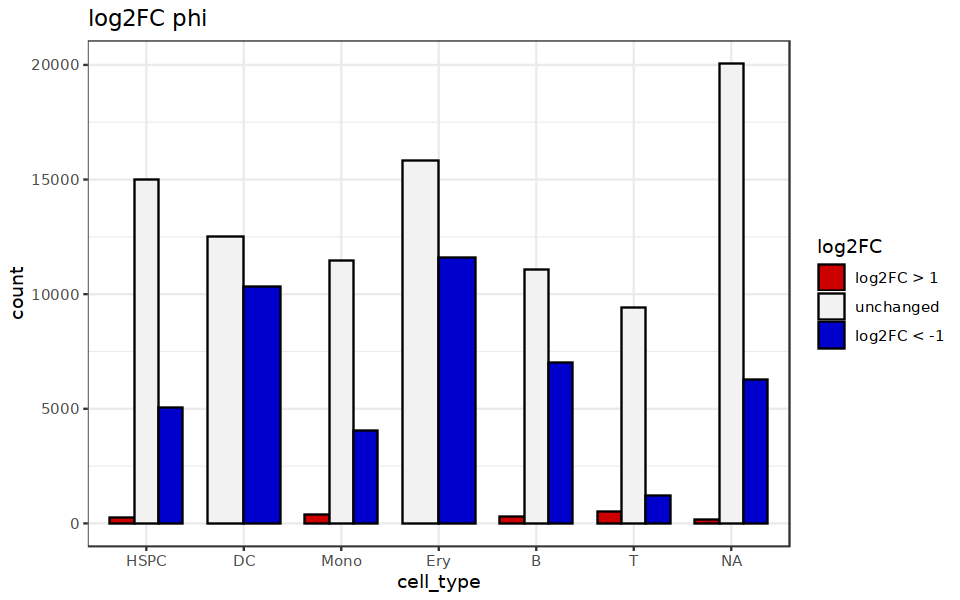

In [37]:
# phi log2FC by cell type
df <- lapply(c("up"
                    ,"unchanged"
                    ,"down")
                   ,function(dir){
                       if(dir == "up"){
                           idx_send <-interactions$anno_interactions$log2FC_phi_s_l > 1 & idx_good
                           idx_rec <- interactions$anno_interactions$log2FC_phi_r_r > 1 & idx_good
                           my_df <- data.frame(cell_type = c(interactions$anno_interactions$sending_cell_type[idx_send]
                                                             ,interactions$anno_interactions$receiving_cell_type[idx_rec])
                                               ,log2FC = rep(dir,sum(idx_send) + sum(idx_rec))
                                              )
                           my_df
                       }else if(dir == "down"){
                           idx_send <-interactions$anno_interactions$log2FC_phi_s_l < -1 
                           idx_rec <- interactions$anno_interactions$log2FC_phi_r_r < -1
                           my_df <- data.frame(cell_type = c(interactions$anno_interactions$sending_cell_type[idx_send]
                                                             ,interactions$anno_interactions$receiving_cell_type[idx_rec])
                                               ,log2FC = rep(dir,sum(idx_send) + sum(idx_rec))
                                              )
                           my_df
                       } else {
                           idx_send <- abs(interactions$anno_interactions$log2FC_phi_s_l) > 1 
                           idx_rec <- abs(interactions$anno_interactions$log2FC_phi_r_r) > 1
                           my_df <- data.frame(cell_type = c(interactions$anno_interactions$sending_cell_type[idx_send]
                                                             ,interactions$anno_interactions$receiving_cell_type[idx_rec])
                                               ,log2FC = rep(dir,sum(idx_send) + sum(idx_rec))
                                              )
                           my_df
                       }
                       
                   }
                       )
df <- rbind(df[[1]],df[[2]],df[[3]])
df$cell_type <- factor(df$cell_type
                         ,levels = c("HSPC"
                                     ,"DC"
                                    ,"Mono"
                                    ,"Ery"
                                    ,"B"
                                    ,"T")
                         ,ordered = TRUE)
df$log2FC <- factor(df$log2FC
                      ,levels = c("up"
                                 ,"unchanged"
                                 ,"down")
                       ,labels = c("log2FC > 1"
                                  ,"unchanged"
                                  ,"log2FC < -1")
                      ,ordered = TRUE)
print(str(df))

           
options(repr.plot.width = 8
       ,repr.plot.height = 5)
p <- ggplot(data = df
          ,aes(x = cell_type
               ,fill = log2FC
              )
           )+
    geom_bar(position = "dodge"
            ,width=.75
            ,color = "black")+
scale_fill_manual(values = c("red3","gray95","blue3"))+
    ggtitle("log2FC phi")+
    #ylim(c(0,3500))+
    theme_bw()

p

'data.frame':	121001 obs. of  2 variables:
 $ cell_type: Ord.factor w/ 6 levels "HSPC"<"DC"<"Mono"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ log2FC   : Ord.factor w/ 3 levels "log2FC > 1"<"unchanged"<..: 1 1 1 1 1 1 1 1 1 1 ...
NULL


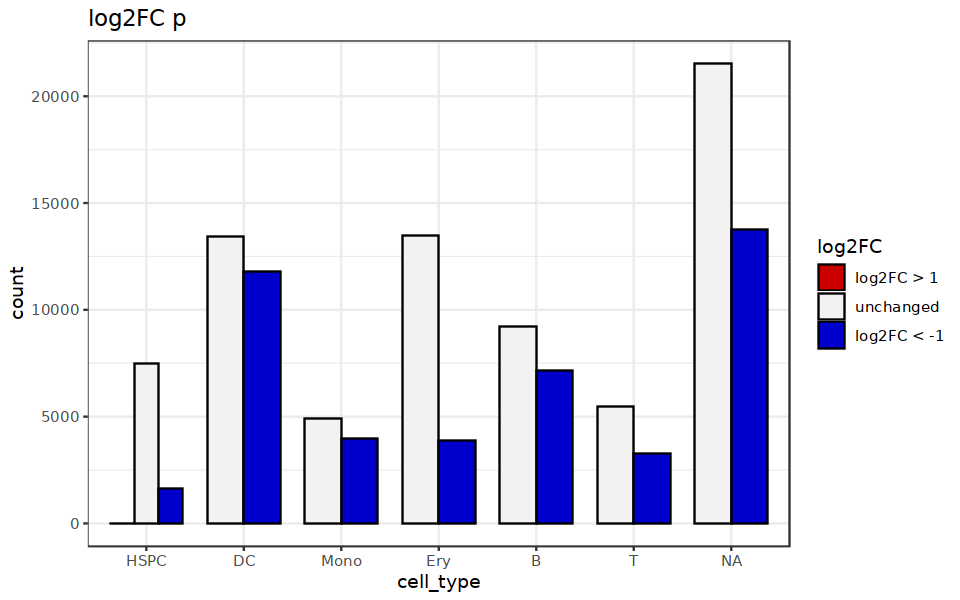

In [38]:
# phi log2FC by cell type
df <- lapply(c("up"
                    ,"unchanged"
                    ,"down")
                   ,function(dir){
                       if(dir == "up"){
                           idx_send <-interactions$anno_interactions$log2FC_p_s_l > 1 & idx_good
                           idx_rec <- interactions$anno_interactions$log2FC_p_r_r > 1 & idx_good
                           my_df <- data.frame(cell_type = c(interactions$anno_interactions$sending_cell_type[idx_send]
                                                             ,interactions$anno_interactions$receiving_cell_type[idx_rec])
                                               ,log2FC = rep(dir,sum(idx_send) + sum(idx_rec))
                                              )
                           my_df
                       }else if(dir == "down"){
                           idx_send <-interactions$anno_interactions$log2FC_p_s_l < -1 
                           idx_rec <- interactions$anno_interactions$log2FC_p_r_r < -1
                           my_df <- data.frame(cell_type = c(interactions$anno_interactions$sending_cell_type[idx_send]
                                                             ,interactions$anno_interactions$receiving_cell_type[idx_rec])
                                               ,log2FC = rep(dir,sum(idx_send) + sum(idx_rec))
                                              )
                           my_df
                       } else {
                           idx_send <- abs(interactions$anno_interactions$log2FC_p_s_l) > 1 
                           idx_rec <- abs(interactions$anno_interactions$log2FC_p_r_r) > 1
                           my_df <- data.frame(cell_type = c(interactions$anno_interactions$sending_cell_type[idx_send]
                                                             ,interactions$anno_interactions$receiving_cell_type[idx_rec])
                                               ,log2FC = rep(dir,sum(idx_send) + sum(idx_rec))
                                              )
                           my_df
                       }
                       
                   }
                       )
df <- rbind(df[[1]],df[[2]],df[[3]])
df$cell_type <- factor(df$cell_type
                         ,levels = c("HSPC"
                                     ,"DC"
                                    ,"Mono"
                                    ,"Ery"
                                    ,"B"
                                    ,"T")
                         ,ordered = TRUE)
df$log2FC <- factor(df$log2FC
                      ,levels = c("up"
                                 ,"unchanged"
                                 ,"down")
                    ,labels = c("log2FC > 1"
                               ,"unchanged"
                               ,"log2FC < -1")
                      ,ordered = TRUE)
print(str(df))

           
options(repr.plot.width = 8
       ,repr.plot.height = 5)
p <- ggplot(data = df
          ,aes(x = cell_type
               ,fill = log2FC
              )
           )+
    geom_bar(position = "dodge"
            ,width=.75
            ,color = "black")+
scale_fill_manual(values = c("red3","gray95","blue3"))+
    ggtitle("log2FC p")+
    #ylim(c(0,3500))+
    theme_bw()

p

### Classes of interactions

In this section, we will check which of the individual components (rho, phi, p) are driving the change of the interactions. For this, we will combine following forest plots: 
- log2 fold change of the interaction weight (`w`)
- log2 fold change of the cell type abundance of the sending cell type (`rho_s`)
- log2 fold change of the active fraction of the sending cell type expressing the ligand (`phi_s_l`)
- log2 fold change of the expression of the sending cell type expressing the ligand (`p_s_l`)
- log2 fold change of the cell type abundance of the receiving cell type (`rho_r`)
- log2 fold change of the active fraction of the receiving cell type expressing the receptor (`phi_r_r`)
- log2 fold change of the expression of the receiving cell type expressing the receptor (`p_r_r`)

We will first explore the interaction that were unchanged. We will start with the interactions that had a trully unchanged log2 fold change of the weight (i.e. -1 < `log2FC_weight` < 1), and then plot the interactions with eigther up- or down-regulated log2 fold change of the weight, which though didn't pass the adjusted p-value threshold.

#### Unchanged

In [39]:
idx_of_interest <- !idx_sign & idx_good
sum(idx_of_interest)

[1] 20106

 No log2FC of the w.

In [40]:
idx_w <- abs(interactions$anno_interactions$log2FC_weights) < 1
sum(idx_of_interest & idx_w)

[1] 8170

[1] "rho"  "none" "phi"  "none" "p"    "none"
[1] "3453 interactions"
[1] "rho"  "one"  "phi"  "none" "p"    "none"
[1] "1574 interactions"
[1] "rho"  "both" "phi"  "none" "p"    "none"
[1] "303 interactions"
[1] "rho"  "none" "phi"  "one"  "p"    "none"
[1] "755 interactions"
[1] "rho"  "none" "phi"  "both" "p"    "none"
[1] "25 interactions"
[1] "rho"  "none" "phi"  "none" "p"    "one" 
[1] "49 interactions"
[1] "rho"  "none" "phi"  "none" "p"    "both"
[1] "0 interactions"
[1] "rho"  "none" "phi"  "one"  "p"    "one" 
[1] "23 interactions"
[1] "rho"  "none" "phi"  "one"  "p"    "both"
[1] "0 interactions"
[1] "rho"  "none" "phi"  "both" "p"    "one" 
[1] "3 interactions"
[1] "rho"  "none" "phi"  "both" "p"    "both"
[1] "0 interactions"
[1] "rho"  "one"  "phi"  "none" "p"    "one" 
[1] "43 interactions"
[1] "rho"  "one"  "phi"  "none" "p"    "both"
[1] "0 interactions"
[1] "rho"  "one"  "phi"  "one"  "p"    "none"
[1] "1496 interactions"
[1] "rho" "one" "phi" "one" "p"   "one"
[1] "

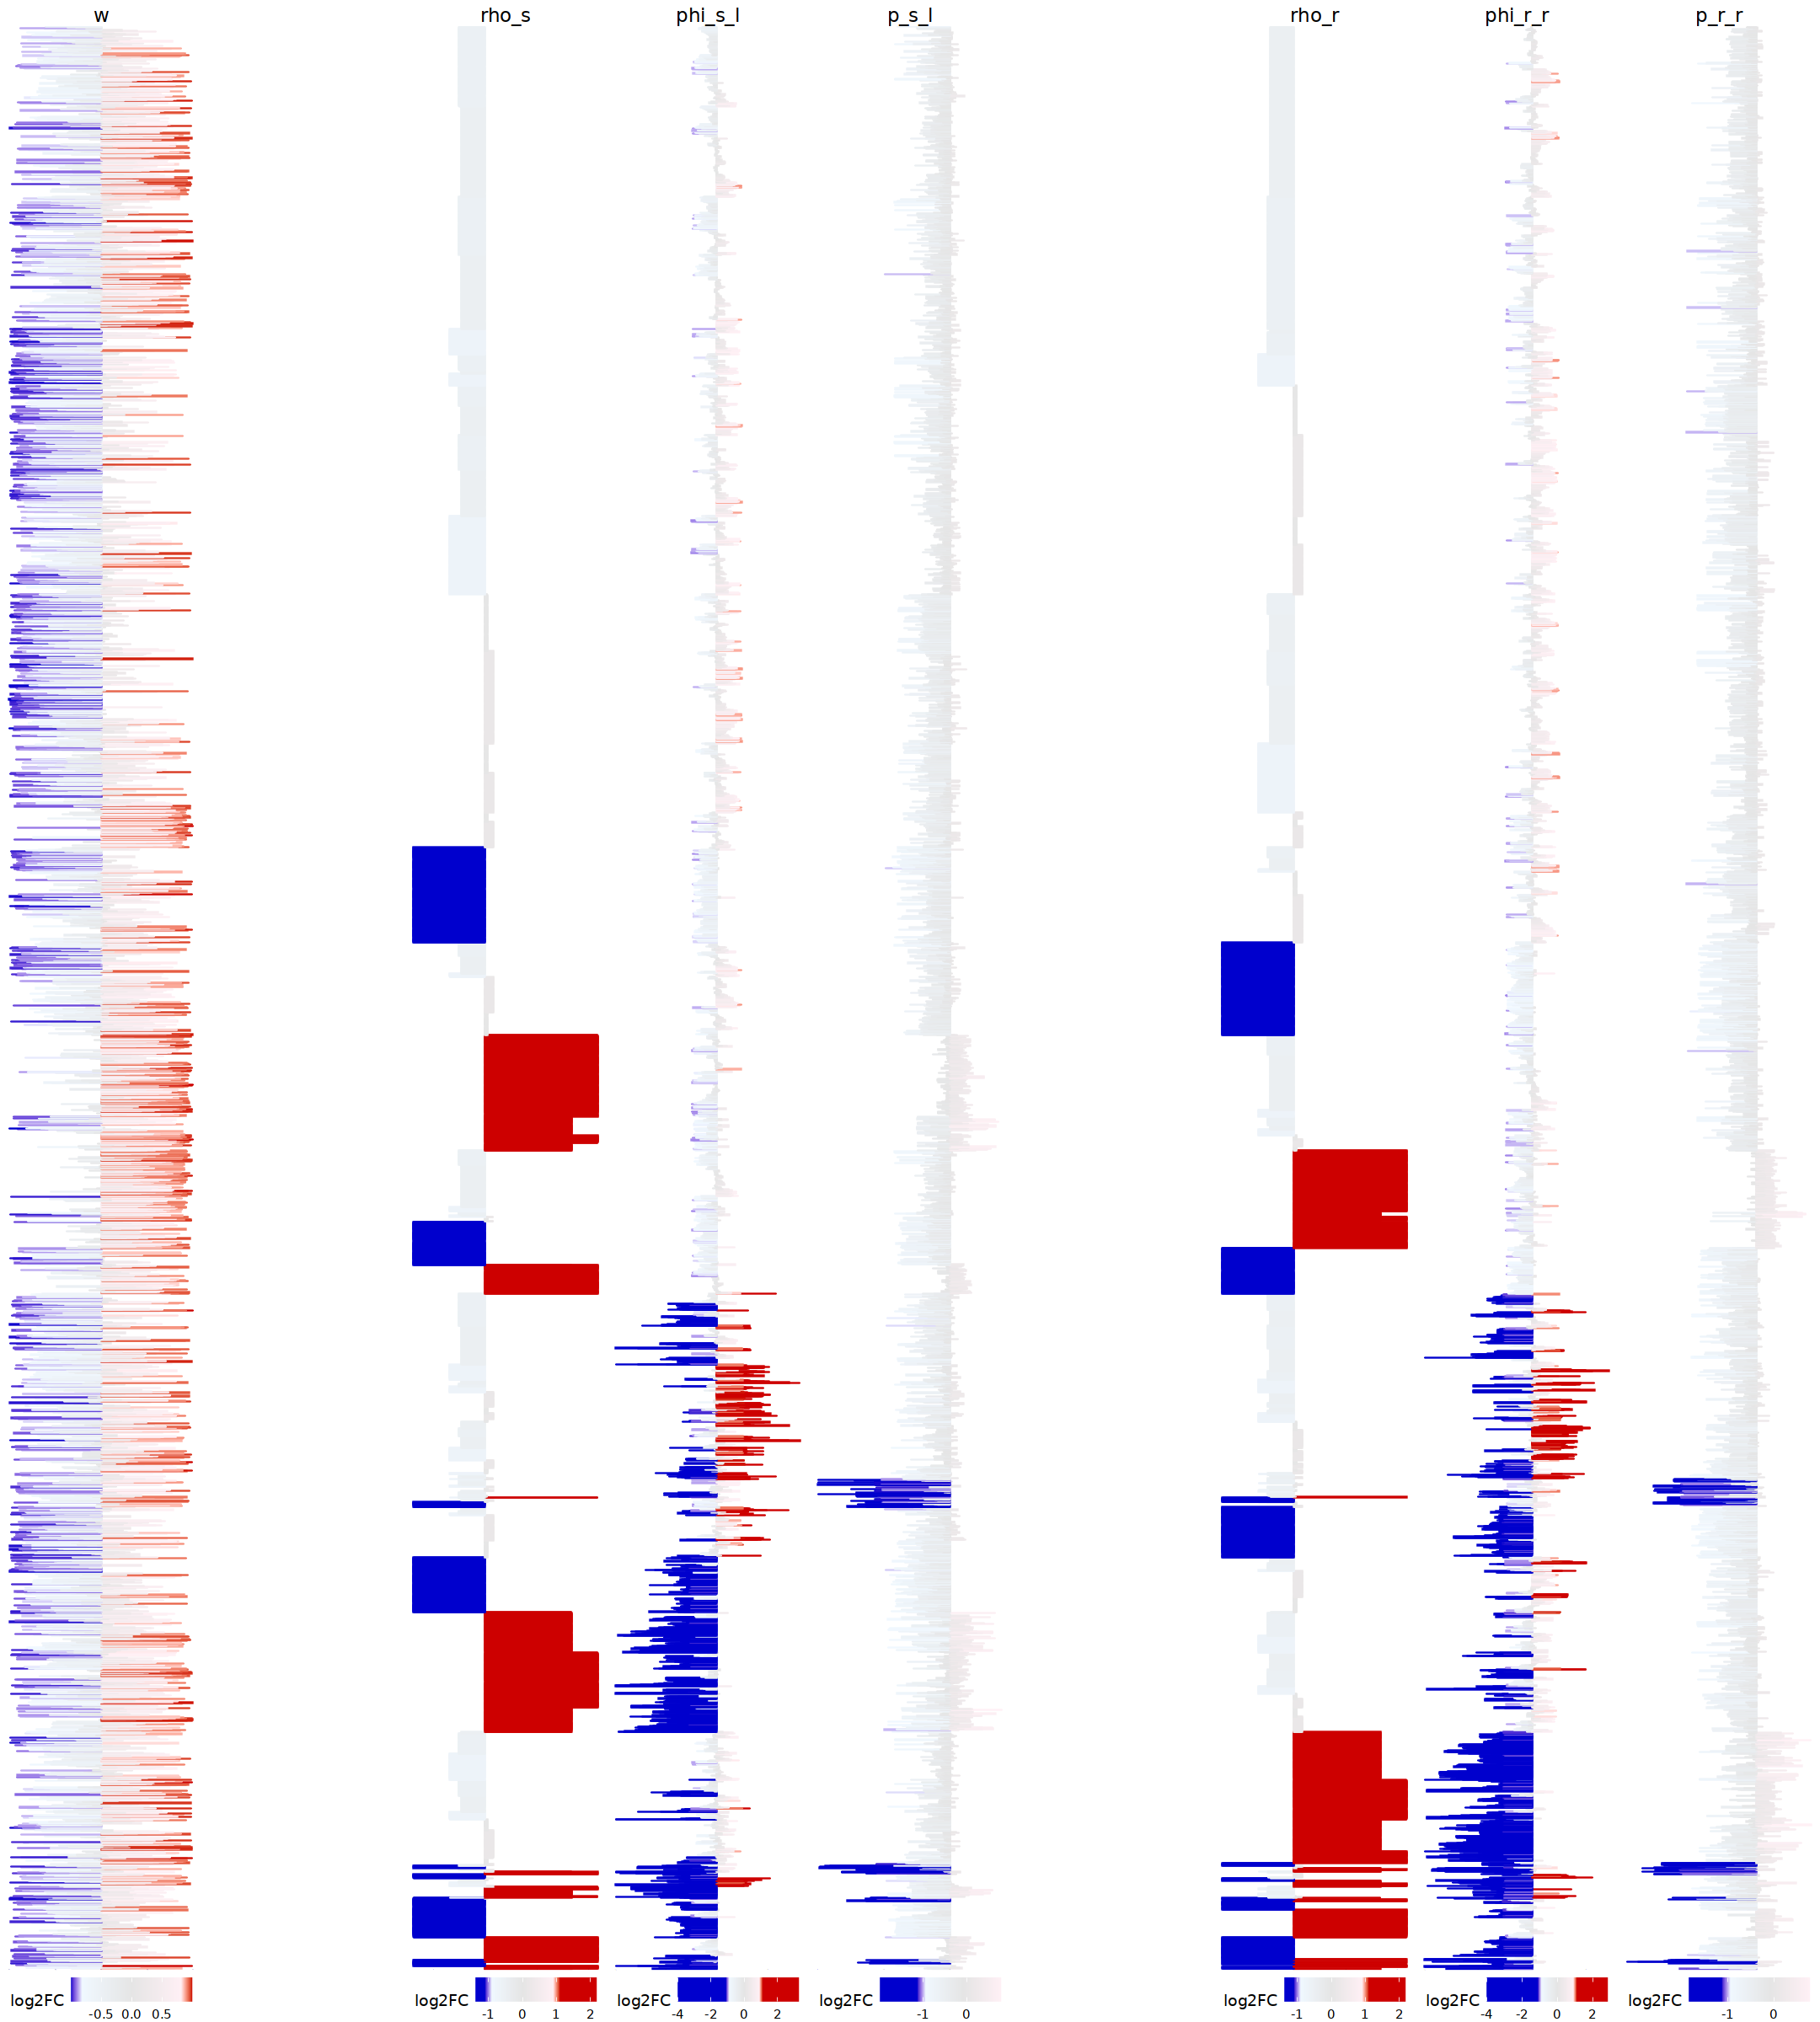

In [41]:
options(repr.plot.height = 20
       ,repr.plot.width = 18)
plot_all_forests(idx_of_interest & idx_w
                ,my_anno_interactions = interactions$anno_interactions)

<span style="color:red">**ADD EXPLANATION OF WHAT WE SEE!!!!!!!!!!!!**</span>

ADD EXPLANATION OF WHAT WE SEE!!!!!!!!!!!!

Log2FC of w > 1, but is not significant.

In [42]:
idx_w <- interactions$anno_interactions$log2FC_weights > 1
sum(idx_of_interest & idx_w)

[1] 5852

[1] "rho"  "none" "phi"  "none" "p"    "none"
[1] "1278 interactions"
[1] "rho"  "one"  "phi"  "none" "p"    "none"
[1] "2044 interactions"
[1] "rho"  "both" "phi"  "none" "p"    "none"
[1] "344 interactions"
[1] "rho"  "none" "phi"  "one"  "p"    "none"
[1] "448 interactions"
[1] "rho"  "none" "phi"  "both" "p"    "none"
[1] "26 interactions"
[1] "rho"  "none" "phi"  "none" "p"    "one" 
[1] "53 interactions"
[1] "rho"  "none" "phi"  "none" "p"    "both"
[1] "0 interactions"
[1] "rho"  "none" "phi"  "one"  "p"    "one" 
[1] "4 interactions"
[1] "rho"  "none" "phi"  "one"  "p"    "both"
[1] "0 interactions"
[1] "rho"  "none" "phi"  "both" "p"    "one" 
[1] "2 interactions"
[1] "rho"  "none" "phi"  "both" "p"    "both"
[1] "0 interactions"
[1] "rho"  "one"  "phi"  "none" "p"    "one" 
[1] "23 interactions"
[1] "rho"  "one"  "phi"  "none" "p"    "both"
[1] "0 interactions"
[1] "rho"  "one"  "phi"  "one"  "p"    "none"
[1] "801 interactions"
[1] "rho" "one" "phi" "one" "p"   "one"
[1] "10

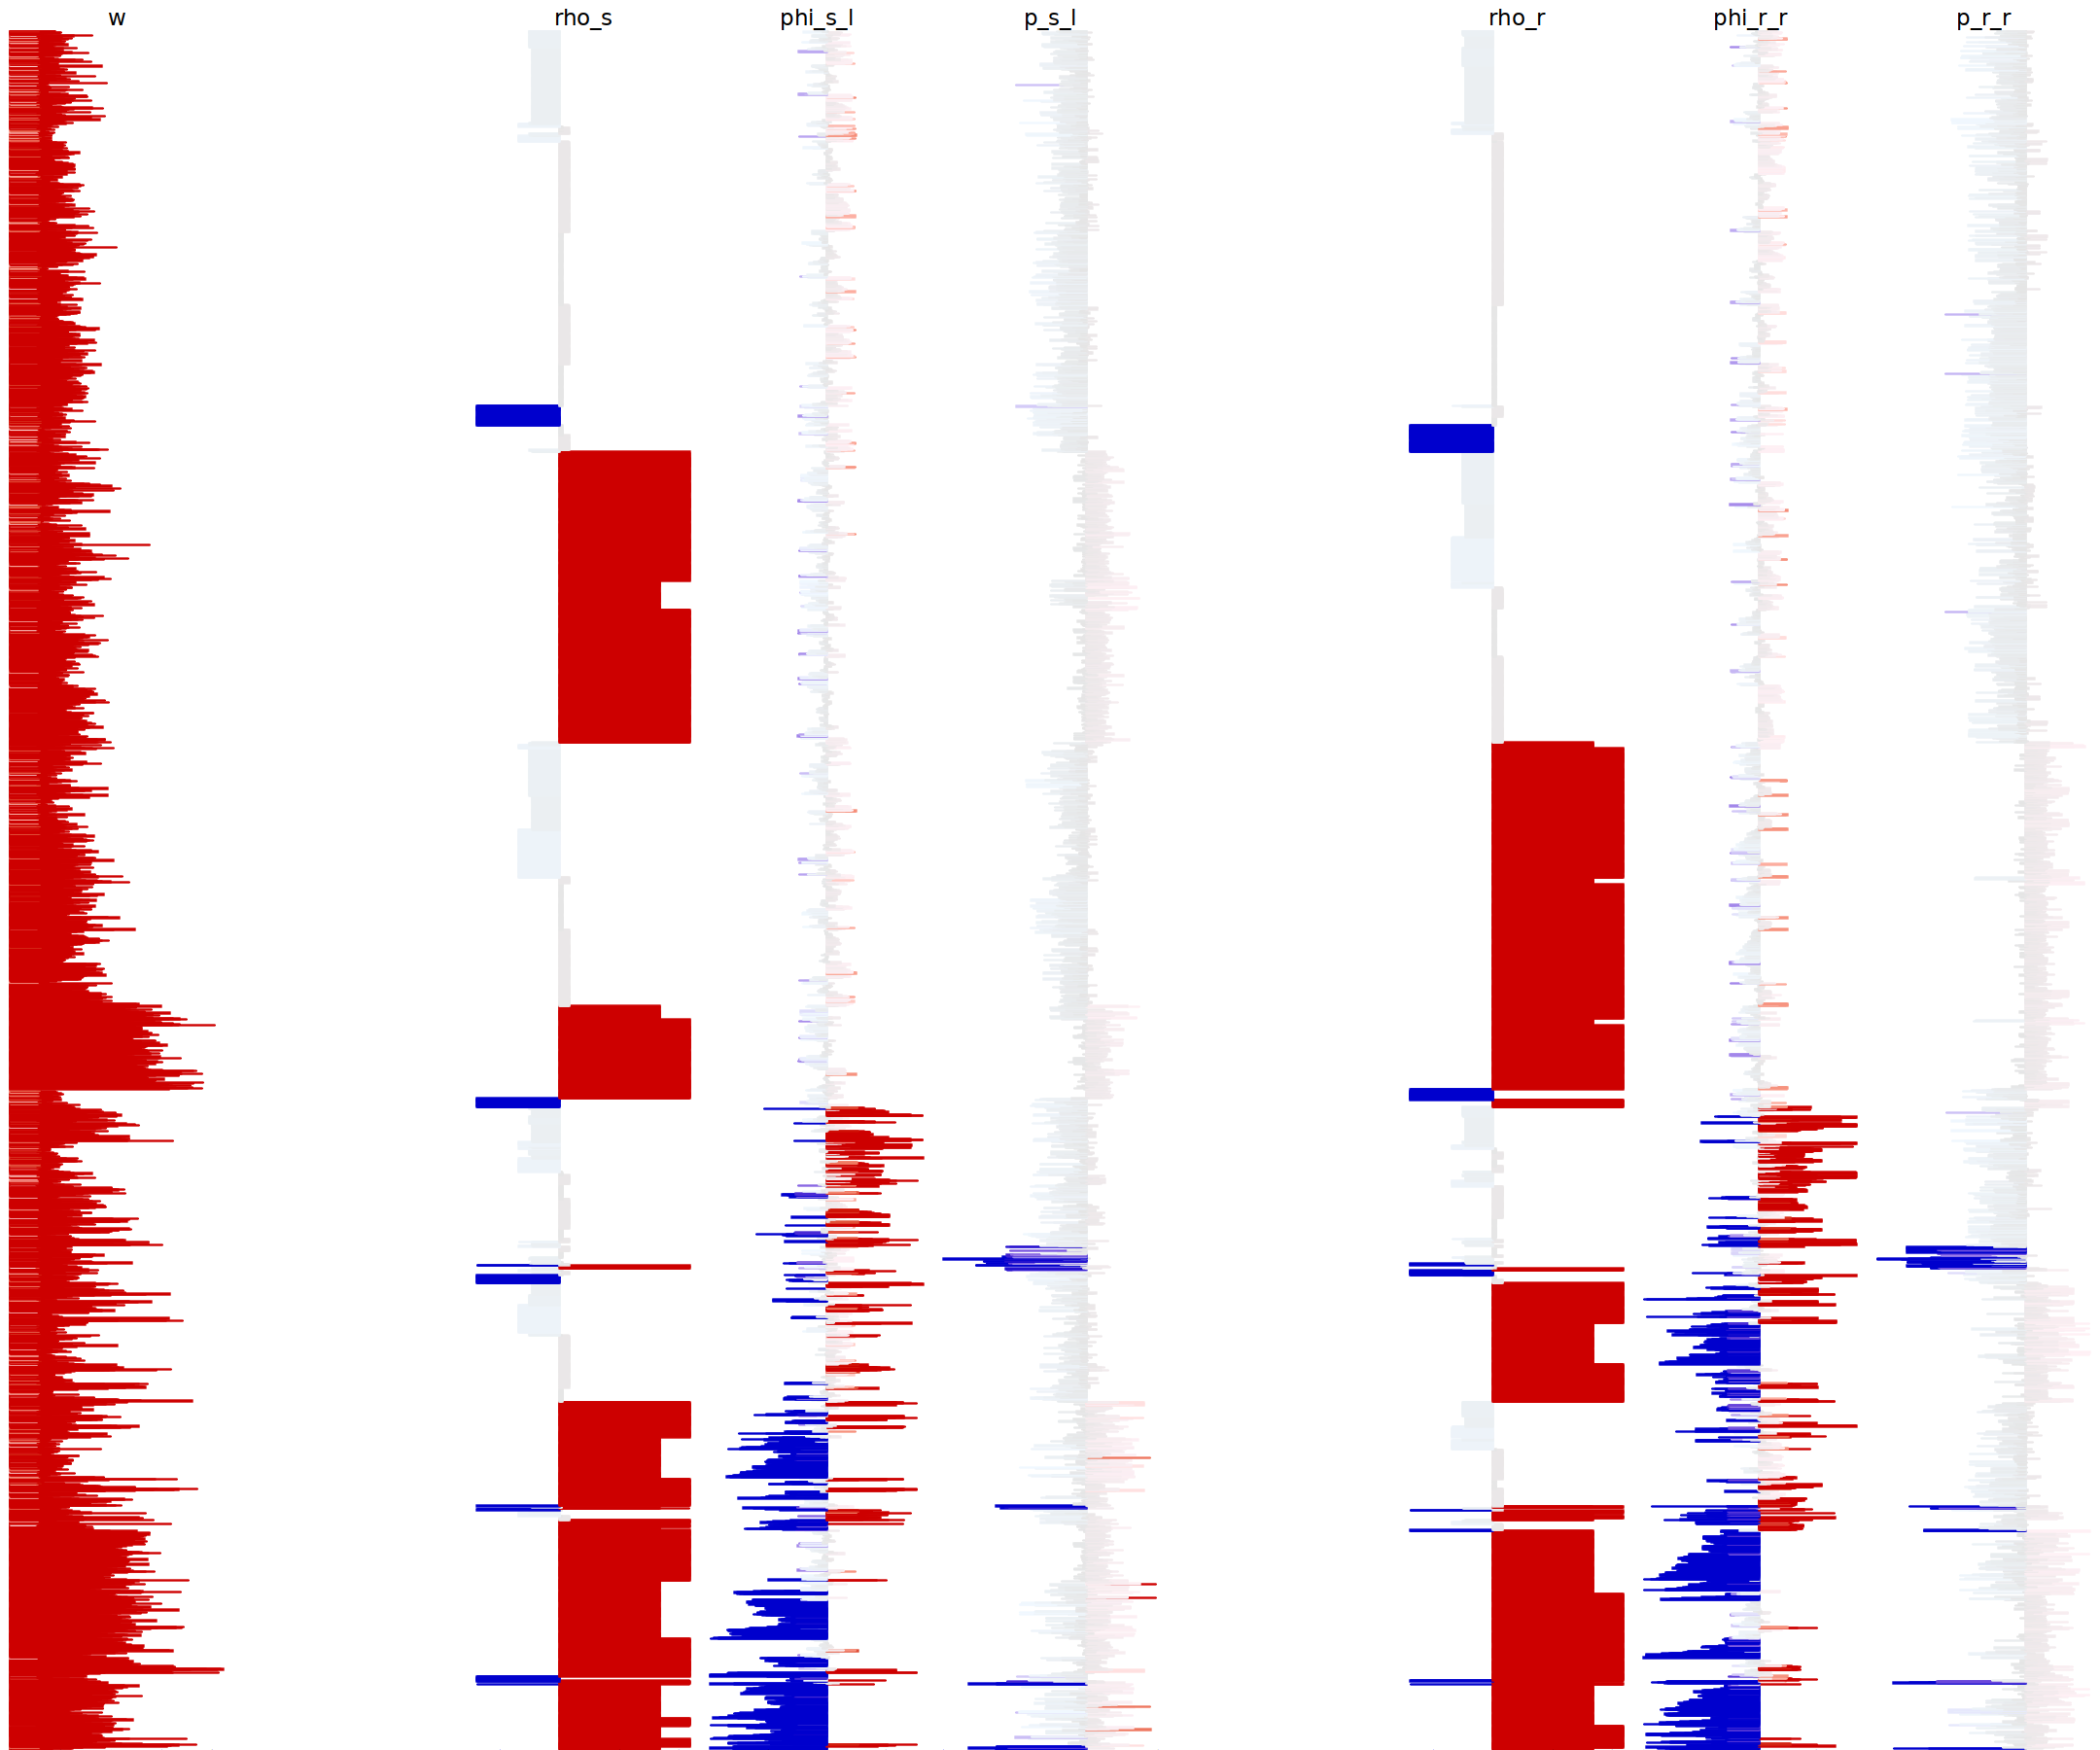

In [43]:
options(repr.plot.height = 15
       ,repr.plot.width = 18)
plot_all_forests(idx_of_interest & idx_w
                ,my_anno_interactions = interactions$anno_interactions, plot_legend=FALSE)

<span style="color:red">**ADD EXPLANATION OF WHAT WE SEE!!!!!!!!!!!!**</span>

ADD EXPLANATION OF WHAT WE SEE!!!!!!!!!!!!

Log2FC of w < -1, but is not significant.

In [44]:
idx_w <- interactions$anno_interactions$log2FC_weights < -1
sum(idx_of_interest & idx_w)

[1] 6084

[1] "rho"  "none" "phi"  "none" "p"    "none"
[1] "2465 interactions"
[1] "rho"  "one"  "phi"  "none" "p"    "none"
[1] "1035 interactions"
[1] "rho"  "both" "phi"  "none" "p"    "none"
[1] "81 interactions"
[1] "rho"  "none" "phi"  "one"  "p"    "none"
[1] "758 interactions"
[1] "rho"  "none" "phi"  "both" "p"    "none"
[1] "38 interactions"
[1] "rho"  "none" "phi"  "none" "p"    "one" 
[1] "43 interactions"
[1] "rho"  "none" "phi"  "none" "p"    "both"
[1] "1 interactions"
[1] "rho"  "none" "phi"  "one"  "p"    "one" 
[1] "31 interactions"
[1] "rho"  "none" "phi"  "one"  "p"    "both"
[1] "0 interactions"
[1] "rho"  "none" "phi"  "both" "p"    "one" 
[1] "6 interactions"
[1] "rho"  "none" "phi"  "both" "p"    "both"
[1] "0 interactions"
[1] "rho"  "one"  "phi"  "none" "p"    "one" 
[1] "11 interactions"
[1] "rho"  "one"  "phi"  "none" "p"    "both"
[1] "1 interactions"
[1] "rho"  "one"  "phi"  "one"  "p"    "none"
[1] "990 interactions"
[1] "rho" "one" "phi" "one" "p"   "one"
[1] "17

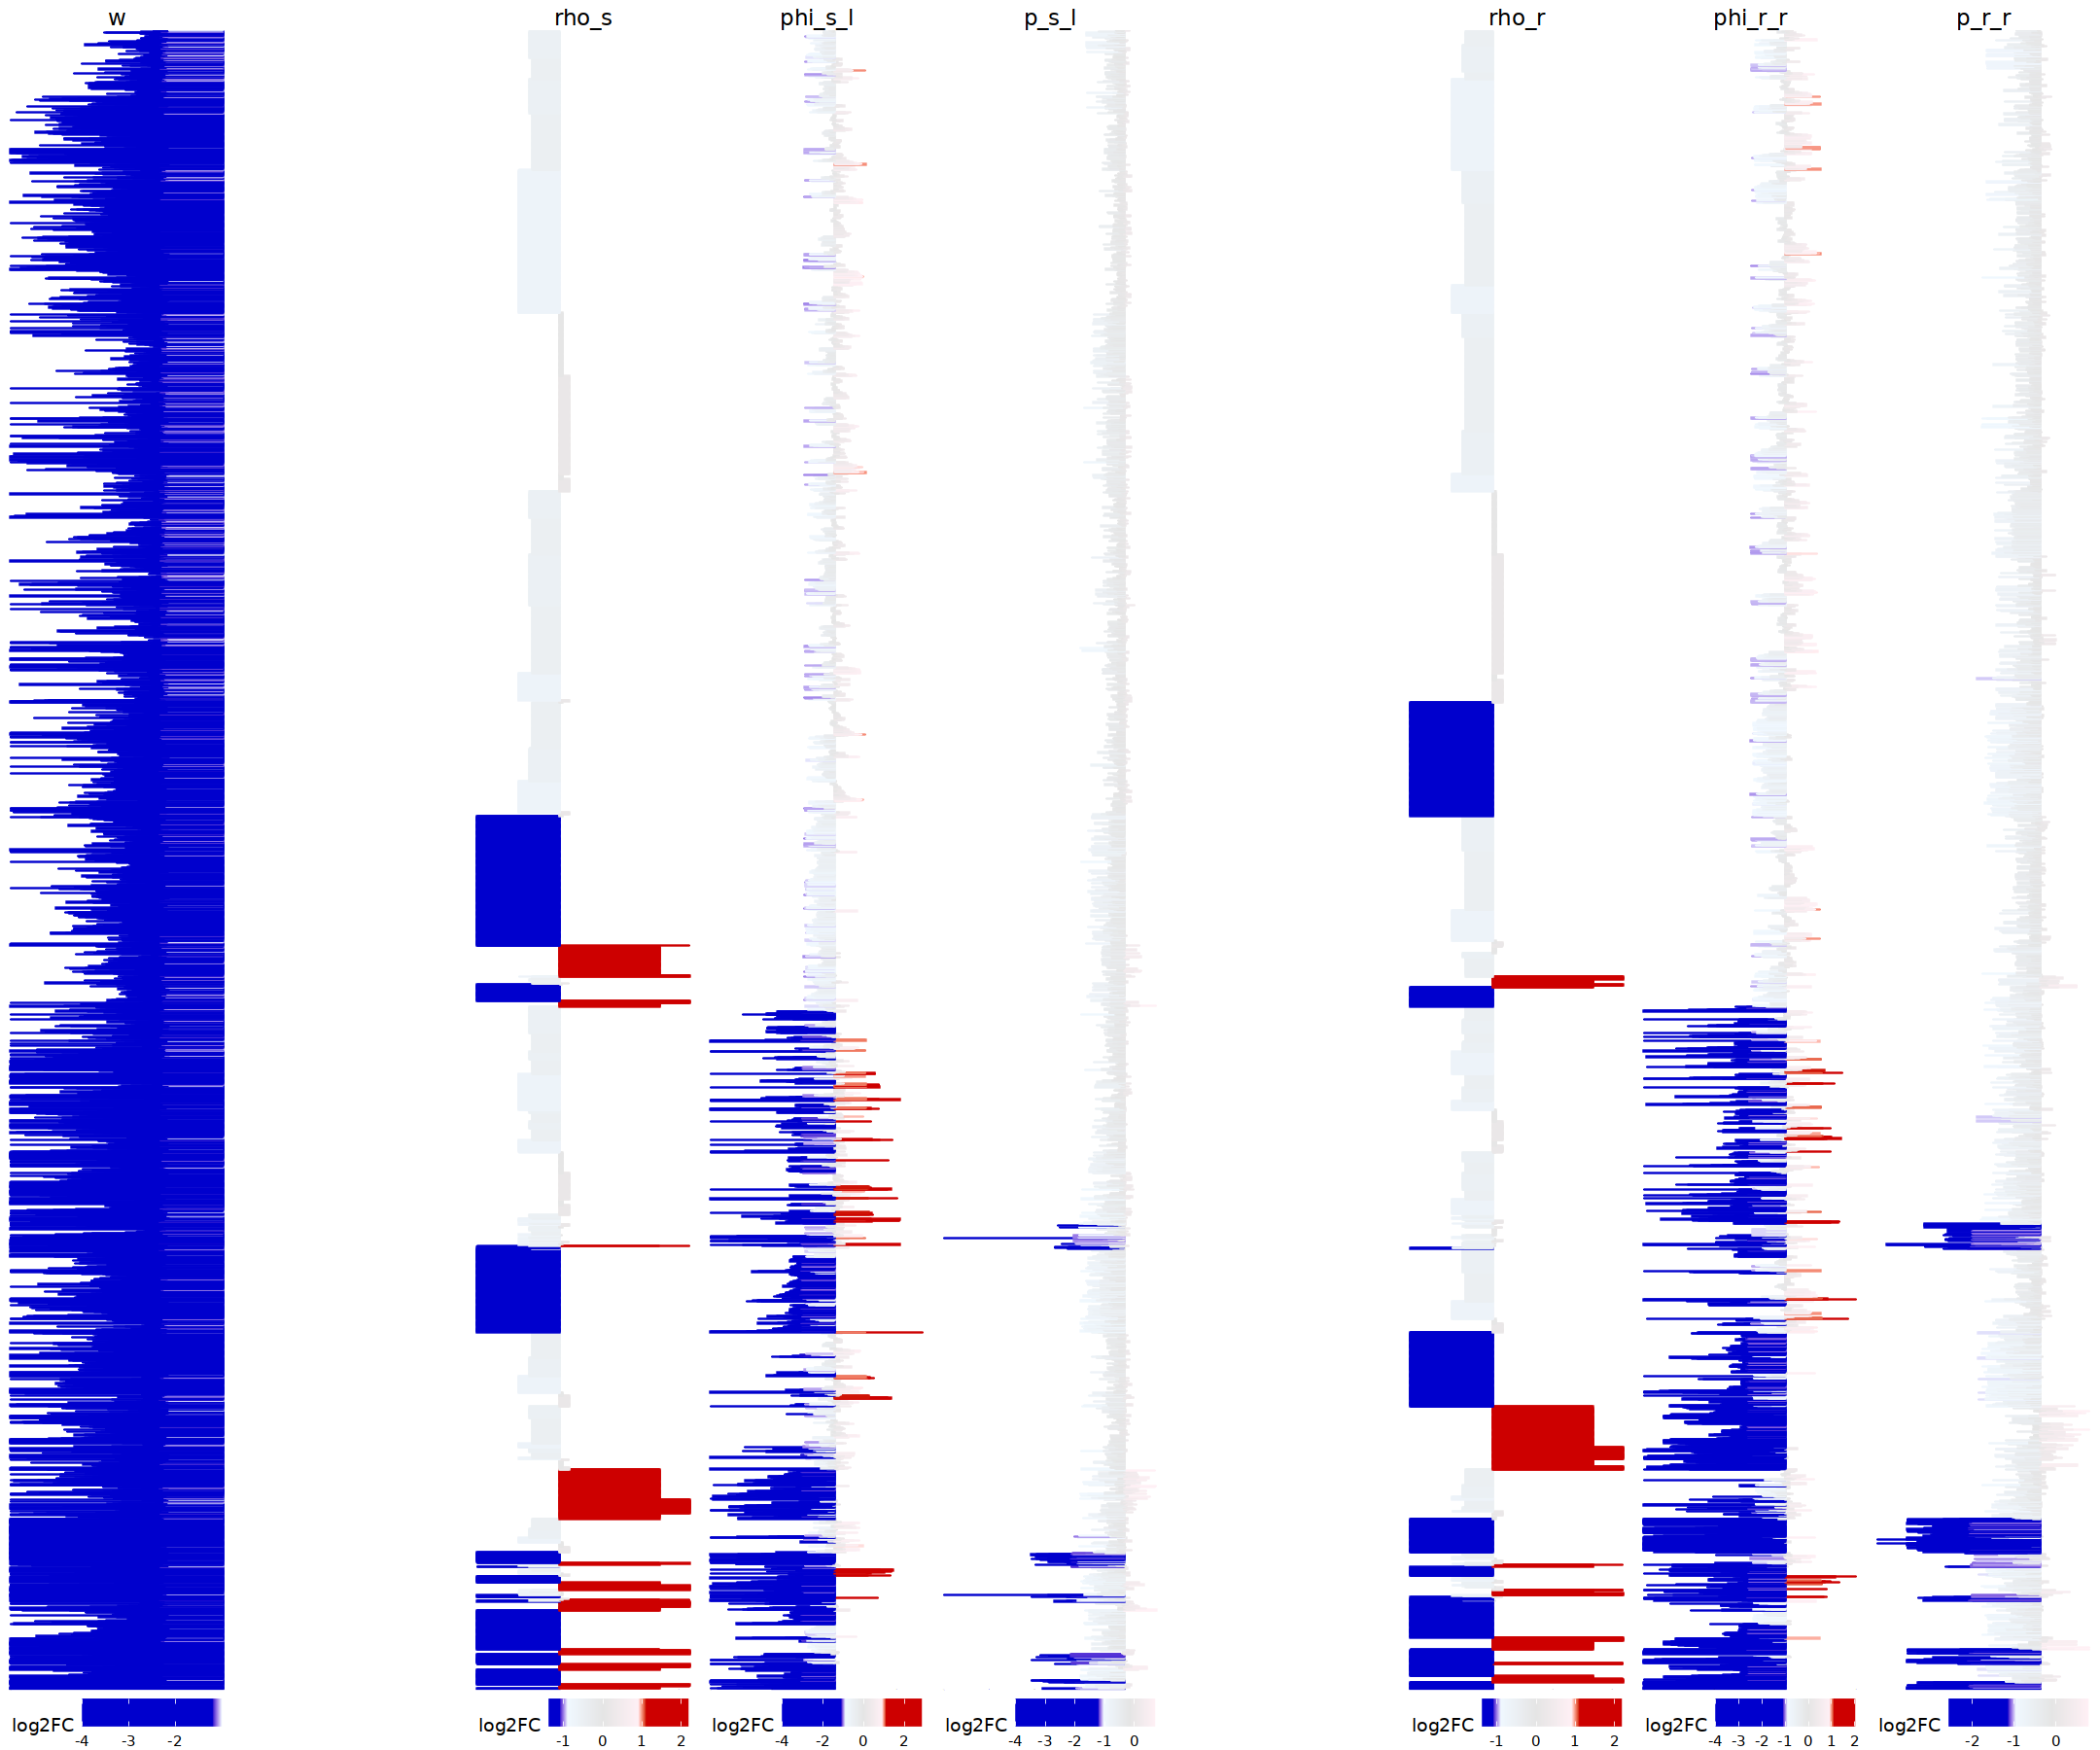

In [45]:
options(repr.plot.height = 15
       ,repr.plot.width = 18)
plot_all_forests(idx_of_interest & idx_w
                ,my_anno_interactions = interactions$anno_interactions)

<span style="color:red">**ADD EXPLANATION OF WHAT WE SEE!!!!!!!!!!!!**</span>


ADD EXPLANATION OF WHAT WE SEE!!!!!!!!!!!!

#### Up-regulated

Now we will explore the interactions in which the `log2FC_weights` passed the upper log2 fold change threshodl, but didn't pass the adjusted p-value threshold.

In [46]:
idx_of_interest <- idx_good & idx_sign & idx_up
sum(idx_of_interest)

[1] 109

[1] "rho"  "none" "phi"  "none" "p"    "none"
[1] "1 interactions"
[1] "rho"  "one"  "phi"  "none" "p"    "none"
[1] "6 interactions"
[1] "rho"  "both" "phi"  "none" "p"    "none"
[1] "1 interactions"
[1] "rho"  "none" "phi"  "one"  "p"    "none"
[1] "0 interactions"
[1] "rho"  "none" "phi"  "both" "p"    "none"
[1] "0 interactions"
[1] "rho"  "none" "phi"  "none" "p"    "one" 
[1] "0 interactions"
[1] "rho"  "none" "phi"  "none" "p"    "both"
[1] "0 interactions"
[1] "rho"  "none" "phi"  "one"  "p"    "one" 
[1] "0 interactions"
[1] "rho"  "none" "phi"  "one"  "p"    "both"
[1] "0 interactions"
[1] "rho"  "none" "phi"  "both" "p"    "one" 
[1] "0 interactions"
[1] "rho"  "none" "phi"  "both" "p"    "both"
[1] "0 interactions"
[1] "rho"  "one"  "phi"  "none" "p"    "one" 
[1] "2 interactions"
[1] "rho"  "one"  "phi"  "none" "p"    "both"
[1] "0 interactions"
[1] "rho"  "one"  "phi"  "one"  "p"    "none"
[1] "47 interactions"
[1] "rho" "one" "phi" "one" "p"   "one"
[1] "13 interactions"

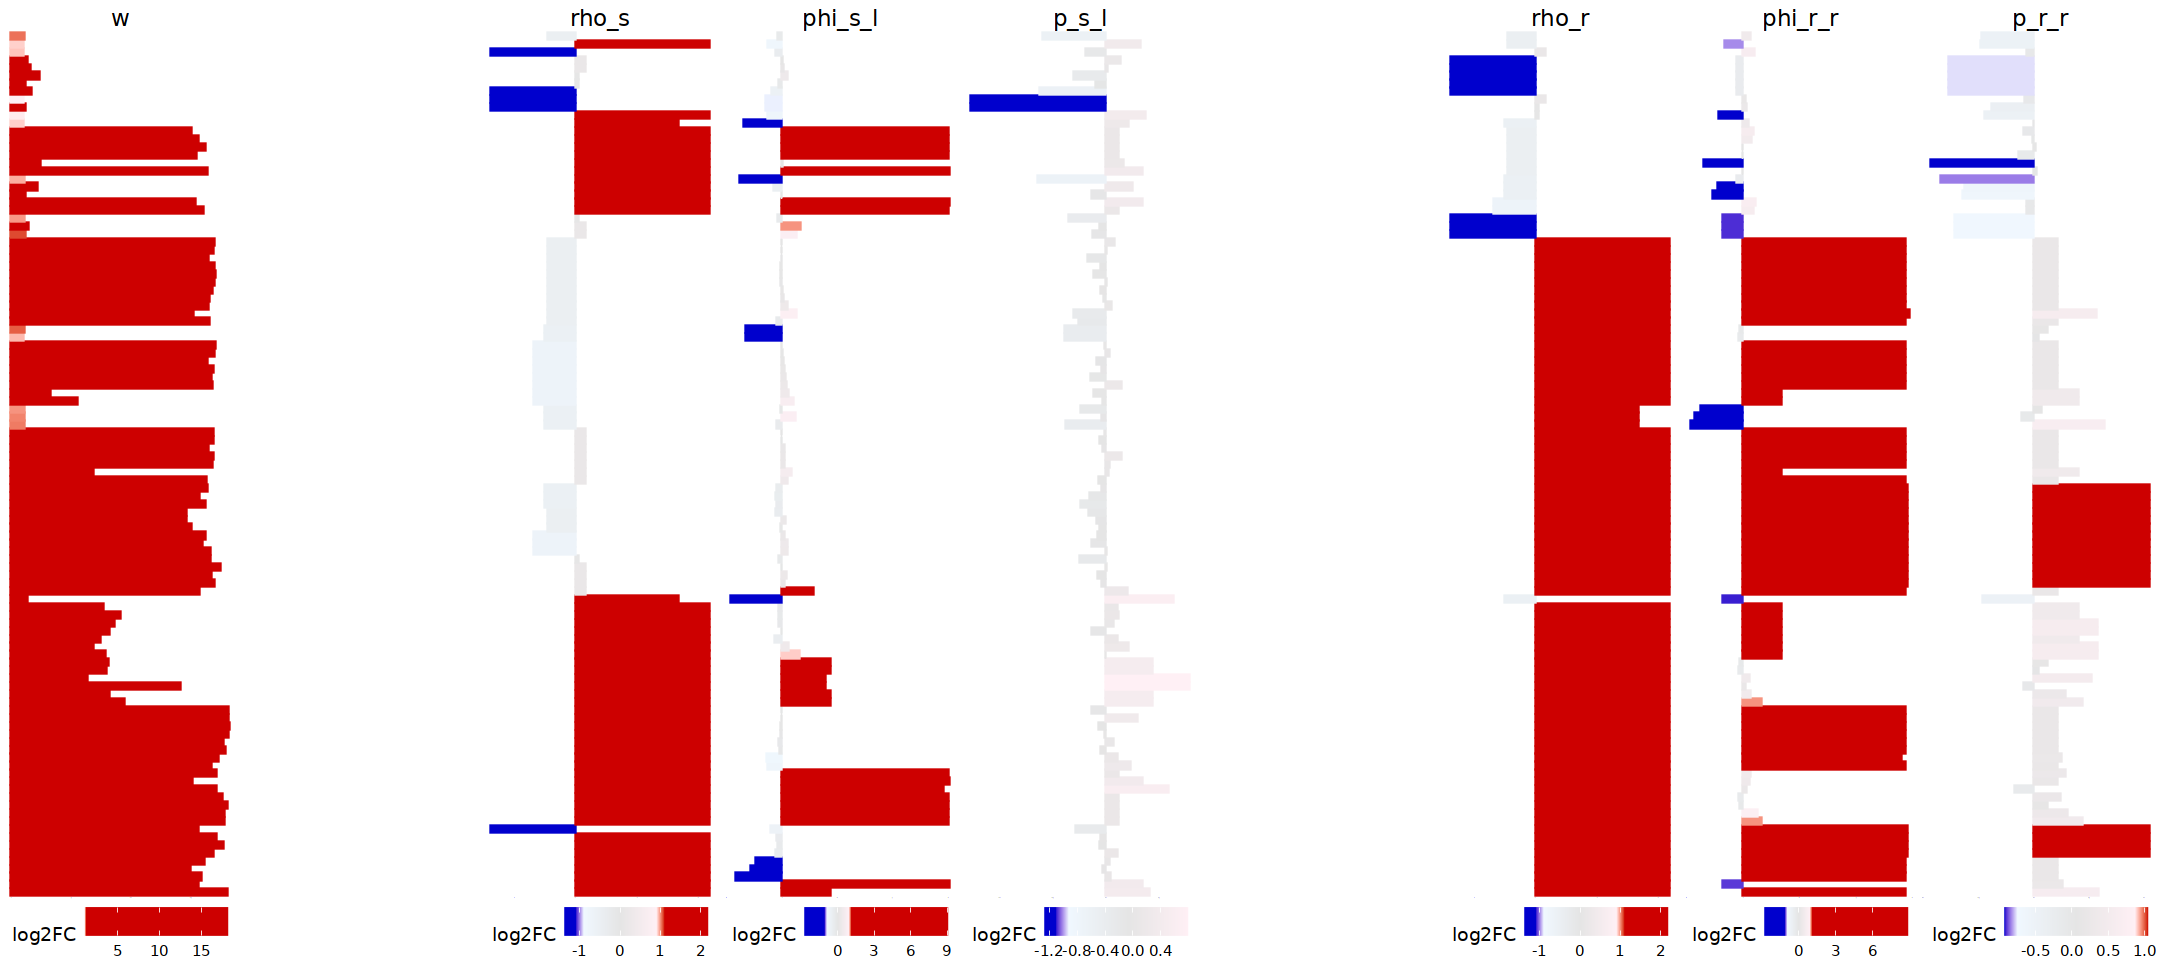

In [47]:
options(repr.plot.height = 8
       ,repr.plot.width = 18)
plot_all_forests(idx_of_interest
                ,my_anno_interactions = interactions$anno_interactions)

<span style="color:red">**ADD EXPLANATION OF WHAT WE SEE!!!!!!!!!!!!**</span>


ADD EXPLANATION OF WHAT WE SEE!!!!!!!!!!!!

#### Down-regulated

Here we will explore the interactions in which the `log2FC_weights` passed the lower log2 fold change threshodl, but didn't pass the adjusted p-value threshold.

In [48]:
idx_of_interest <- idx_good & idx_sign & idx_down
sum(idx_of_interest)

[1] 2631

[1] "rho"  "none" "phi"  "none" "p"    "none"
[1] "268 interactions"
[1] "rho"  "one"  "phi"  "none" "p"    "none"
[1] "144 interactions"
[1] "rho"  "both" "phi"  "none" "p"    "none"
[1] "24 interactions"
[1] "rho"  "none" "phi"  "one"  "p"    "none"
[1] "366 interactions"
[1] "rho"  "none" "phi"  "both" "p"    "none"
[1] "25 interactions"
[1] "rho"  "none" "phi"  "none" "p"    "one" 
[1] "4 interactions"
[1] "rho"  "none" "phi"  "none" "p"    "both"
[1] "0 interactions"
[1] "rho"  "none" "phi"  "one"  "p"    "one" 
[1] "41 interactions"
[1] "rho"  "none" "phi"  "one"  "p"    "both"
[1] "0 interactions"
[1] "rho"  "none" "phi"  "both" "p"    "one" 
[1] "6 interactions"
[1] "rho"  "none" "phi"  "both" "p"    "both"
[1] "0 interactions"
[1] "rho"  "one"  "phi"  "none" "p"    "one" 
[1] "16 interactions"
[1] "rho"  "one"  "phi"  "none" "p"    "both"
[1] "0 interactions"
[1] "rho"  "one"  "phi"  "one"  "p"    "none"
[1] "919 interactions"
[1] "rho" "one" "phi" "one" "p"   "one"
[1] "165 i

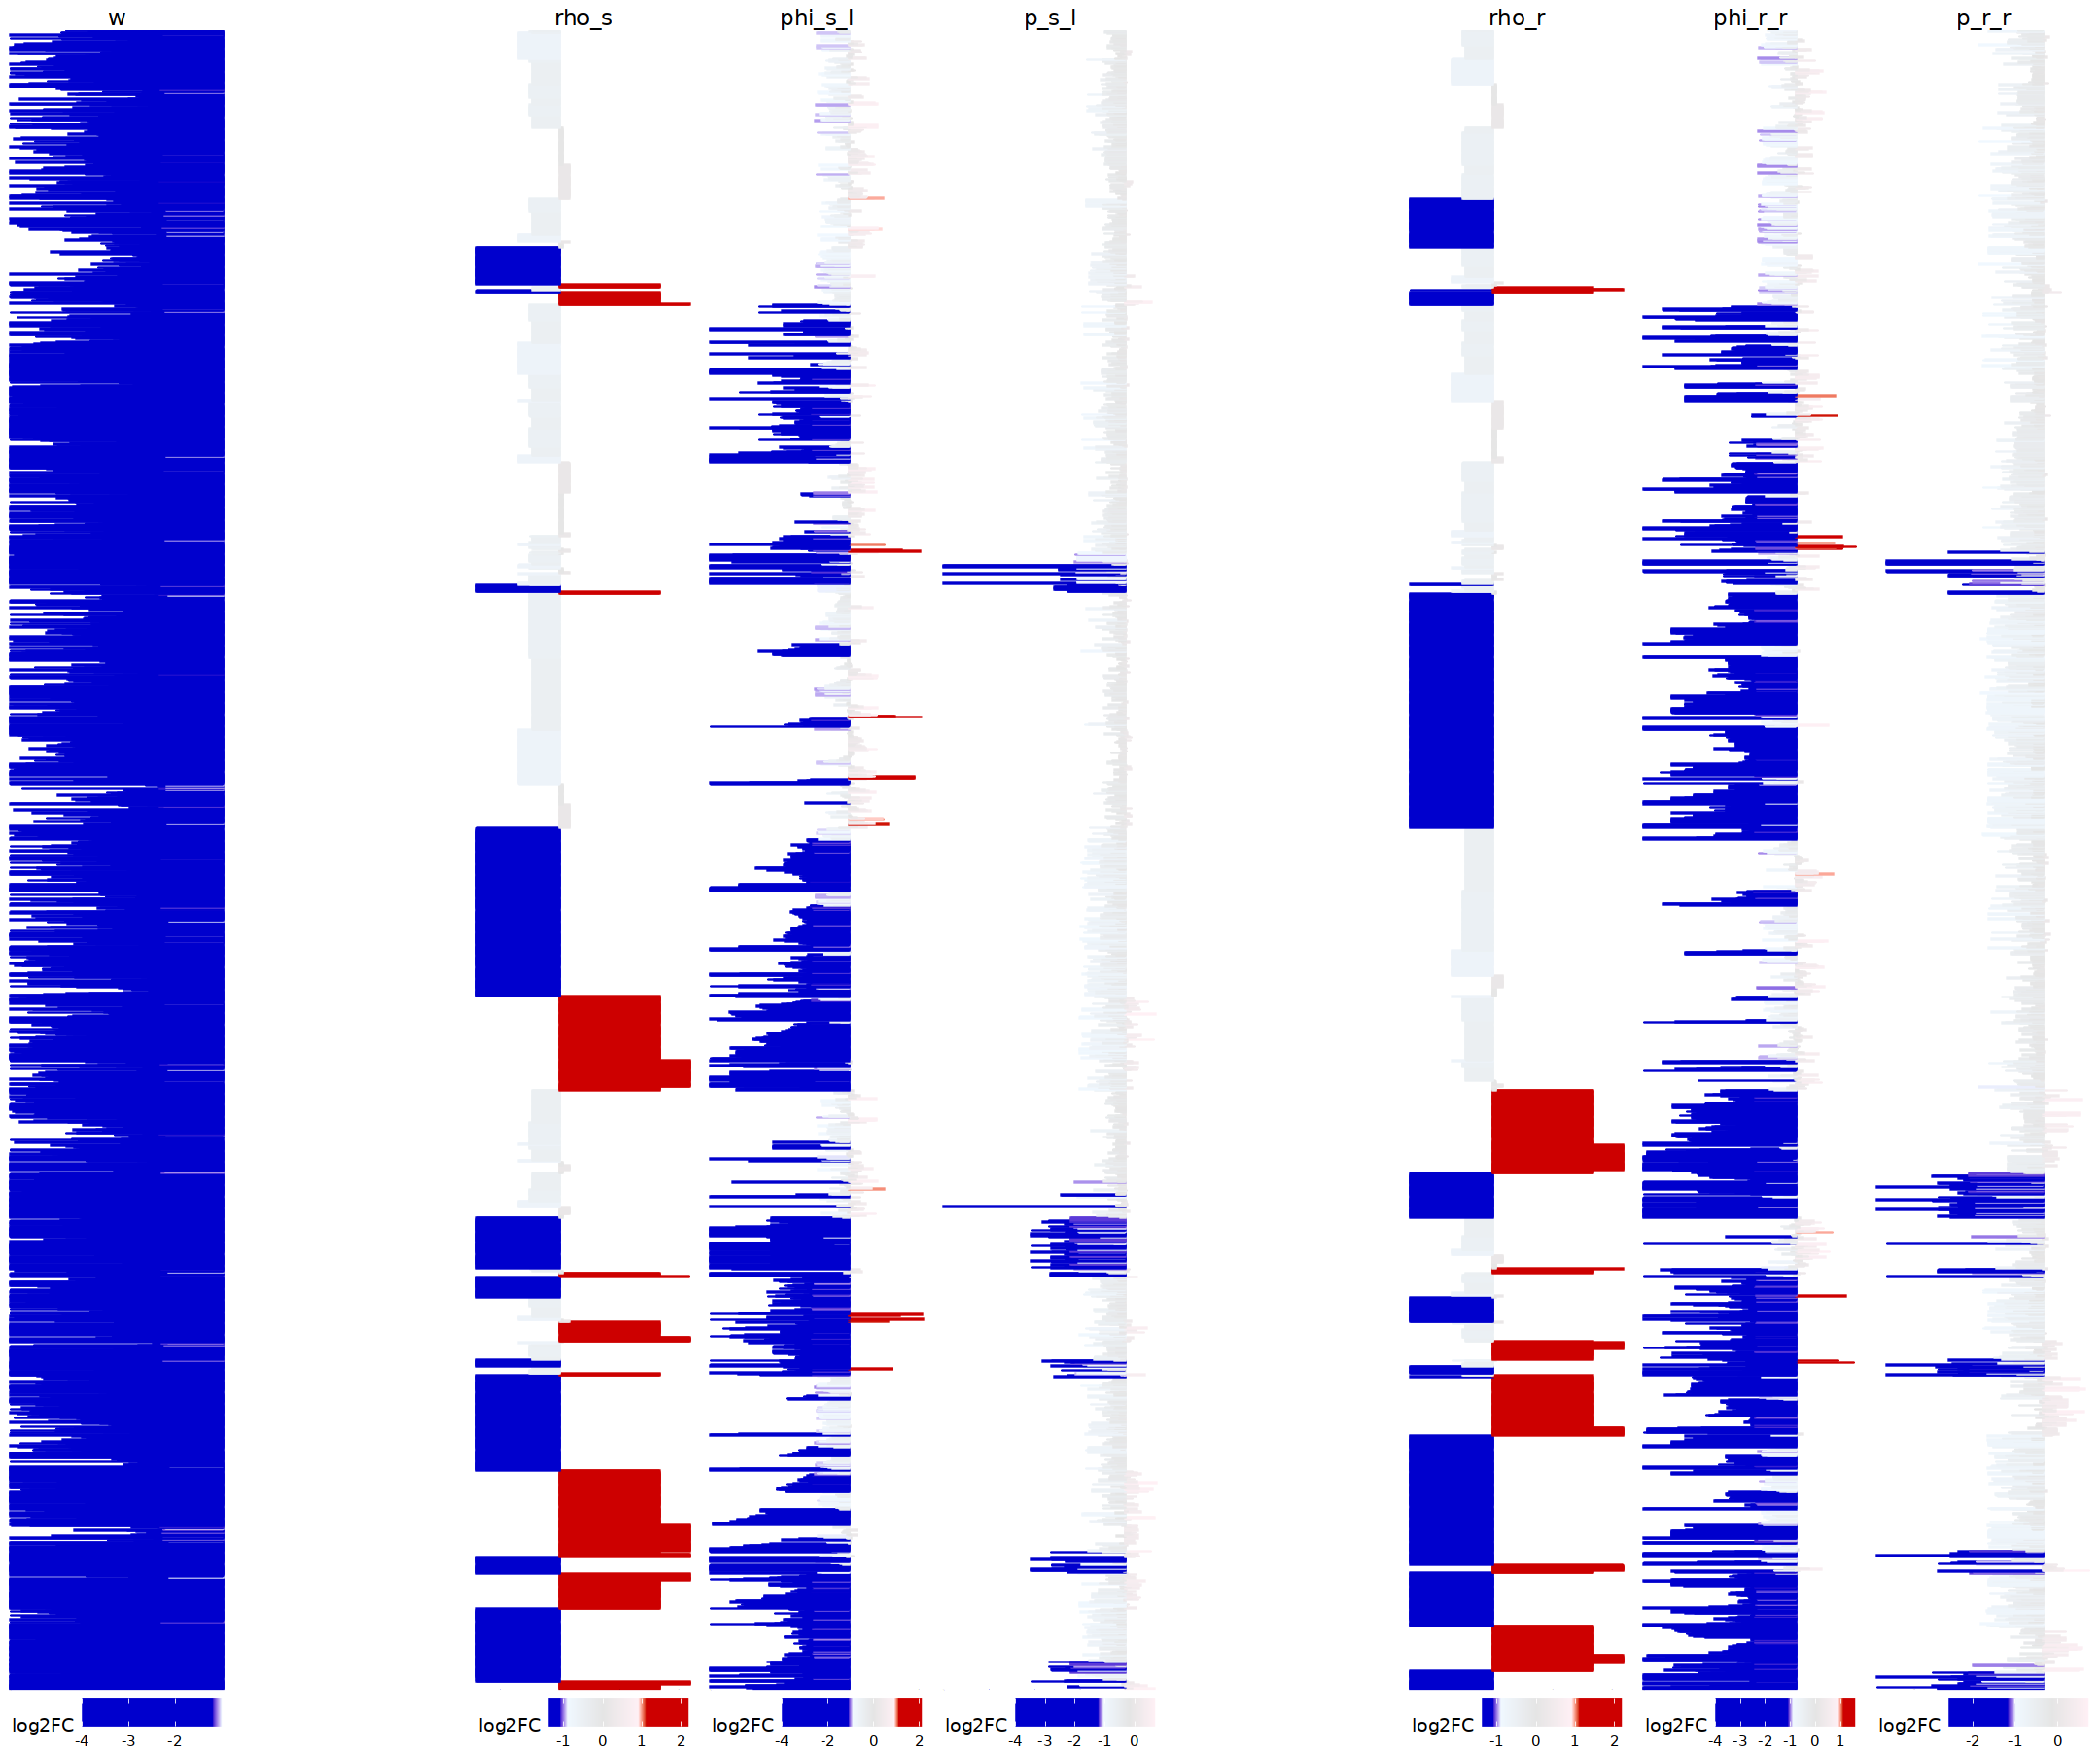

In [49]:
options(repr.plot.height = 15
       ,repr.plot.width = 18)
plot_all_forests(idx_of_interest
                ,my_anno_interactions = interactions$anno_interactions)

<span style="color:red">**ADD EXPLANATION OF WHAT WE SEE!!!!!!!!!!!!**</span>


ADD EXPLANATION OF WHAT WE SEE!!!!!!!!!!!!

### Heatmap number of differential interactions

[1] "Mono"
[1] "Mono"
              interaction_ID log2FC_weights sign
14      Mono:ANXA1_Mono:FPR2      -1.353877 TRUE
78       Mono:PVR_Mono:CD226      -2.272267 TRUE
97  Mono:TNFSF8_Mono:TNFRSF8      -4.559338 TRUE
125       Mono:CD48_Mono:CD2      -2.042923 TRUE
281       Mono:APP_Mono:FPR2      -2.508518 TRUE
324       Mono:B2M_Mono:CD1C      -2.827132 TRUE
[1] 28
[1] "Mono"
[1] "Gran"
           interaction_ID log2FC_weights sign
2336 Mono:ANXA1_Gran:FPR1      -1.964107 TRUE
2337 Mono:ANXA1_Gran:FPR2     -18.047691 TRUE
2604   Mono:APP_Gran:FPR2     -17.126163 TRUE
2752 Mono:CALM1_Gran:HMMR      -3.253792 TRUE
2792  Mono:CAMP_Gran:FPR2     -16.912659 TRUE
3317 Mono:GNAI2_Gran:FPR1      -2.281556 TRUE
[1] 24
[1] "Mono"
[1] "T"
          interaction_ID log2FC_weights sign
4680  Mono:EFNA4_T:EPHA4     -14.891758 TRUE
4724    Mono:PVR_T:CD226     -17.172321 TRUE
4771     Mono:CD48_T:CD2      -2.330808 TRUE
4809    Mono:PVR_T:TIGIT      -5.098629 TRUE
4886 Mono:AGTRAP_T:RACK1      -1.

Warning message:
“The input is a data frame-like object, convert it to a matrix.”


[1] "Mono"
[1] "Mono"
           interaction_ID log2FC_weights sign
1773 Mono:POMC_Mono:GPR84       1.152092 TRUE
[1] 1
[1] "Mono"
[1] "Gran"
[1] interaction_ID log2FC_weights sign          
<0 rows> (or 0-length row.names)
[1] 0
[1] "Mono"
[1] "T"
[1] interaction_ID log2FC_weights sign          
<0 rows> (or 0-length row.names)
[1] 0
[1] "Mono"
[1] "NK"
[1] interaction_ID log2FC_weights sign          
<0 rows> (or 0-length row.names)
[1] 0
[1] "Mono"
[1] "B"
[1] interaction_ID log2FC_weights sign          
<0 rows> (or 0-length row.names)
[1] 0
[1] "Mono"
[1] "HSPC"
              interaction_ID log2FC_weights sign
12050  Mono:CALM1_HSPC:PDE1B       15.03711 TRUE
12063  Mono:CALM2_HSPC:PDE1B       14.64876 TRUE
12075  Mono:CALM3_HSPC:PDE1B       14.60462 TRUE
12172    Mono:CD36_HSPC:TLR4       16.46448 TRUE
12769   Mono:HMGB1_HSPC:TLR4       16.80705 TRUE
12792 Mono:HSP90B1_HSPC:TLR4       16.54663 TRUE
[1] 14
[1] "Mono"
[1] "Ery"
[1] interaction_ID log2FC_weights sign          
<0 row

Warning message:
“The input is a data frame-like object, convert it to a matrix.”


[[1]]
png 
  2 

[[2]]
png 
  2

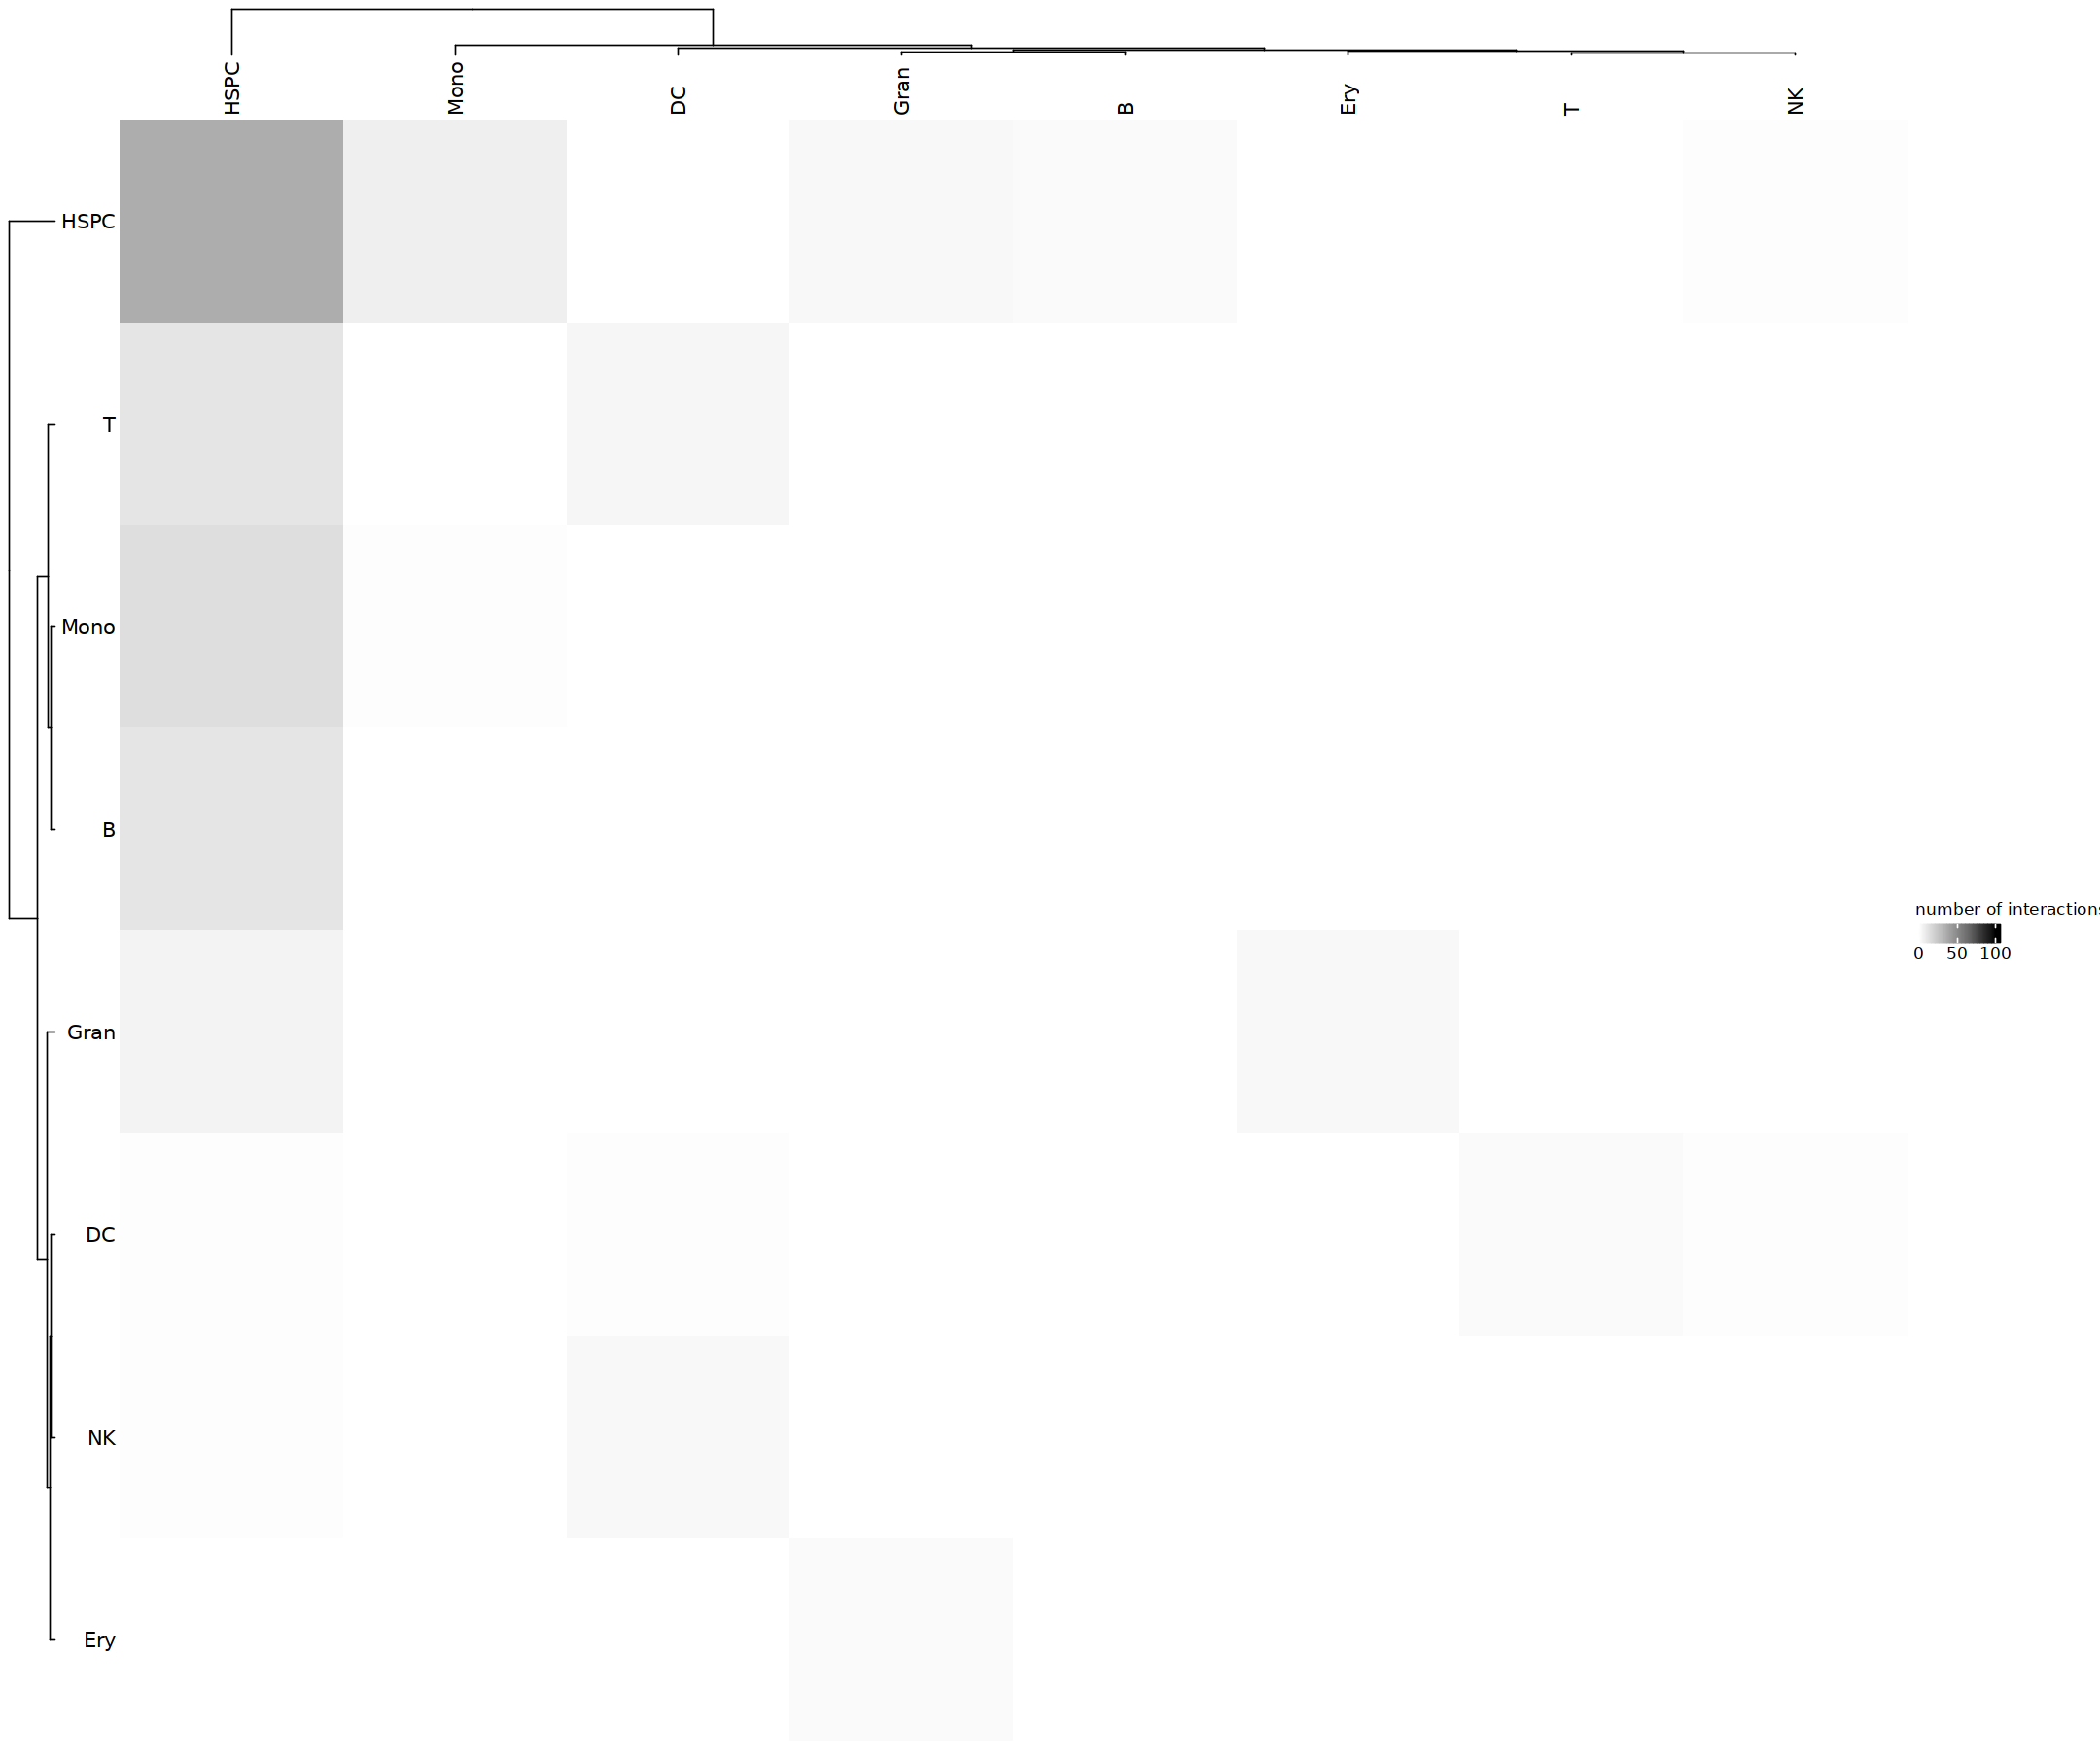

In [50]:
# mean number of interactions as heatmap
lapply(c("down"
         ,"up"
         #,"unchanged"
        )
       ,function(dir){
           # subset interactions
    ifelse(dir == "up"
              ,idx <- idx_good & idx_sign & idx_up
              ,ifelse(dir == "down"
                      ,idx <- idx_good & idx_sign & idx_down
                      ,idx <- !idx_sign & idx_good
                     )
              )
    
    # create a dummy data frame
    df <- as.data.frame(matrix(,nrow = length(cell_types)
                              ,ncol = length(cell_types)
                              )
                       )
    rownames(df) <- cell_types
    colnames(df) <- cell_types
    
    # populate the data frame
    for(send in cell_types){
        idx_send <- interactions$anno_interactions$sending_cell_type == send
        
        for(rec in cell_types){
            idx_rec <- interactions$anno_interactions$receiving_cell_type == rec
            
            print(send)
            print(rec)
            print(head(interactions$anno_interactions[idx & idx_send & idx_rec,c("interaction_ID","log2FC_weights", "sign")]))
            print(sum(idx & idx_send & idx_rec))
            
            df[send,rec] <- sum(idx & idx_send & idx_rec)
            
        }
    }
    
    print(df)
           
    my_color <-  colorRamp2(seq(0
                                ,100 #300
                                , length = 4)
                            , c("white","gray70","gray40","black"))
    
    h <- Heatmap(df
                 ,name = "number of interactions"
                 ,heatmap_legend_param = list(direction = "horizontal")
                 ,column_names_side = "top"
                 ,row_names_side = "left"
                 ,col = my_color
                )
           print(h
             #,heatmap_legend_side = "bottom"
                )
           
    pdf(file=paste0("figures/heatmap_cellTypes_number_"
                   ,dir
                   ,".pdf"))
          print(h
             #,heatmap_legend_side = "bottom"
               )
           dev.off()
    
       }
       )

### GO

# Export

In [51]:
print("save interactions.RData")
save(interactions, file = "interactions.RData")

[1] "save interactions.RData"
